
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1    0.596836                4.035824          2165.172870   
2    0.856962                4.083182          2165.205703   
3    0.904750                4.040479          2162.301308   
4    0.896080                3.879843          2162.913839   
5    0.824639                4.082216          2166.794825   
..        ...                     ...                  ...   
664  1.186454                6.073810          2166.917829   
665  1.413000                7.773399          2161.564894   
666  1.598680                8.149620          2159.013129   
667  2.525363                7.255188          2169.149378   
668  1.911000                3.545891          2092.281705   

     NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1              9346.772129   185.667362                    0.0           0.0   
2             10573.753745   185.872366                    0.0           0.0   
3              9581.807810   185.754062                    0.0           0.0   
4              9568.245462   184.849687                    0.0           0.0   
5              9426.679822   185.801026                    0.0           0.0   
..                     ...          ...                    ...           ...   
664            3296.712453   195.734319                    0.0           0.0   
665            3301.595335   195.866368                    0.0           0.0   
666            3299.654193   195.960410                    0.0           0.0   
667            3233.701294   196.879126                    0.0           0.0   
668               3.695841   162.606598                    0.0           0.0   

     Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1             0.310        0.19  44564.0    37.0  126.168421   
2             0.336        0.21  44564.0    38.0  166.409836   
3             0.340        0.22  44564.0    39.0  156.037975   
4             0.386        0.20  44564.0    40.0  174.500000   
5             0.338        0.27  44565.0    41.0  156.336391   
..              ...         ...      ...     ...         ...   
664           0.331        0.43  44530.0  4125.0  149.209877   
665           0.261        0.98  44530.0  4126.0  145.039474   
666           0.302        0.63  44530.0  4127.0  163.714286   
667           0.255        0.35  44530.0  4128.0  191.640000   
668           0.370        0.46  44530.0  4129.0  150.397661   

     Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1              20.976974             18.129760             4.318006   
2              20.974064             18.017290             4.601488   
3              20.976920             18.133568             4.424230   
4              20.751609             18.328385             4.369288   
5              21.016238             18.119561             4.251019   
..                   ...                   ...                  ...   
664            25.692435             15.306401             2.932644   
665            25.931787             14.907545             3.253390   
666            26.094852             15.502587             3.335944   
667            25.887924             15.494710             3.350725   
668            27.400057             11.146683             1.764315   

     Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1              55.346067    161.429470    196.437498    154.526414   
2              55.125150    162.110054    199.729620    154.818347   
3              55.327805    159.747827    205.022659    159.688297   
4              55.448962    148.837074    171.045117    146.449130   
5              55.403762    152.139637    188.014678    154.416522   
..                   ...           ...           ...           ...   
664            55.547649    144.651687    145.228045    140.338941   
665            55.132147    141.608369    144.798705    141.836466   
666            54.555485    149.652689    171.3610

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 1 to 668
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    668 non-null    float64
 1   HOST_BLAST_MOISTURE_f3   668 non-null    float64
 2   HOT_BLAST_TMP_NS_f3      668 non-null    float64
 3   NAT_GAS _INJECTION_f3    668 non-null    float64
 4   WINDRATE_f3              668 non-null    float64
 5   HIGH_PURITY_OXYGEN_f3    668 non-null    float64
 6   COAL_FLOW_f3             668 non-null    float64
 7   Cast_Avg_Mn_f2           668 non-null    float64
 8   Slag_Fe_f2               668 non-null    float64
 9   date_f1                  668 non-null    float64
 10  CNUM                     668 non-null    float64
 11  LNUM_f1                  668 non-null    float64
 12  Selec_Top_Gas_CO_f3      668 non-null    float64
 13  Selec_Top_Gas_CO2_f3     668 non-null    float64
 14  Selec_Top_Gas_H2_f3      6

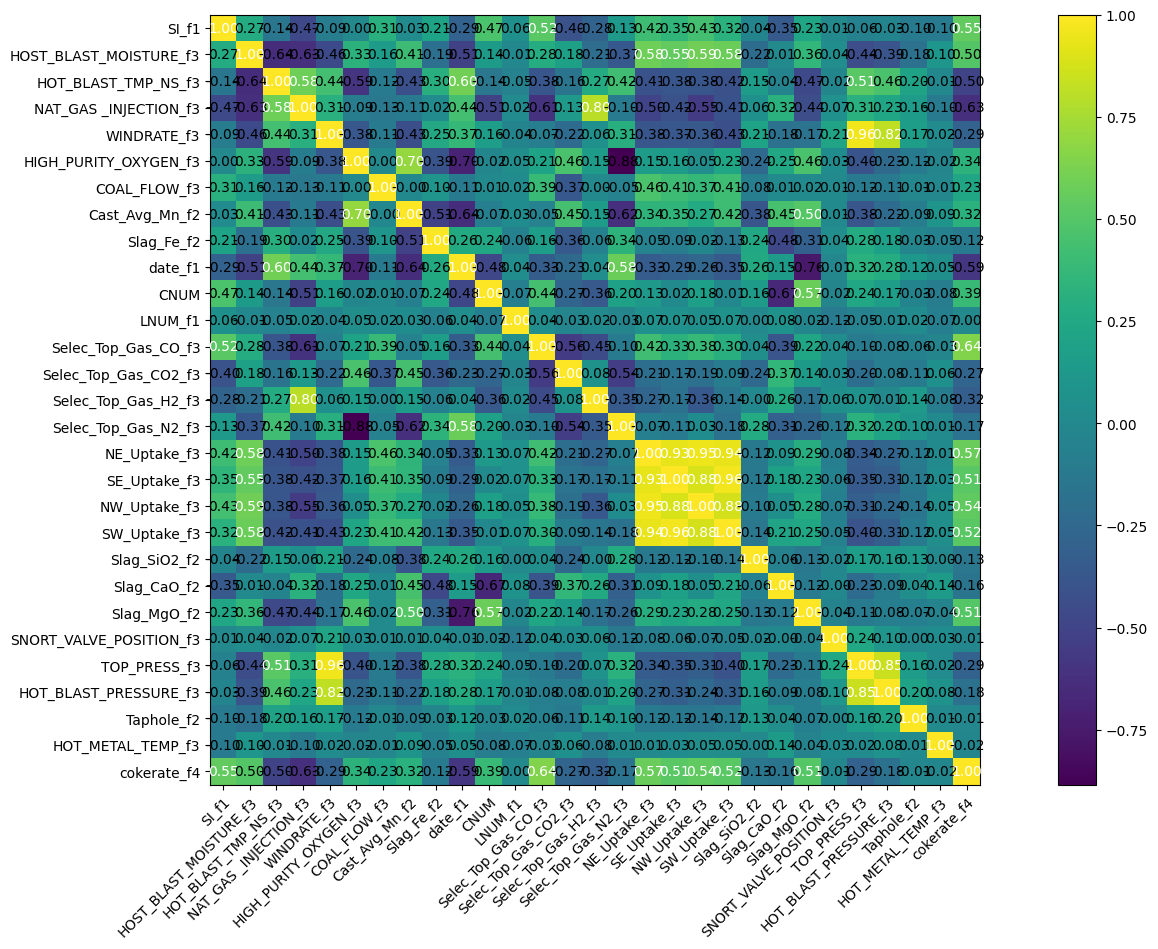

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1    0.596836  2022-01-03 20:05:00                4.035824   
2    0.856962  2022-01-03 20:13:00                4.083182   
3    0.904750  2022-01-03 23:05:00                4.040479   
4    0.896080  2022-01-03 00:47:00                3.879843   
5    0.824639  2022-01-04 03:17:00                4.082216   
..        ...                  ...                     ...   
664  1.186454  2021-11-30 01:52:00                6.073810   
665  1.413000  2021-11-30 03:24:00                7.773399   
666  1.598680  2021-11-30 05:13:00                8.149620   
667  2.525363  2021-11-30 05:21:00                7.255188   
668  1.911000  2021-11-30 20:55:00                3.545891   

     HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1            2165.172870            9346.772129   185.667362   
2            2165.205703           10573.753745   185.872366   
3            2162.301308            9581.807810   185.754062   
4            2162.913839            9568.245462   184.849687   
5            2166.794825            9426.679822   185.801026   
..                   ...                    ...          ...   
664          2166.917829            3296.712453   195.734319   
665          2161.564894            3301.595335   195.866368   
666          2159.013129            3299.654193   195.960410   
667          2169.149378            3233.701294   196.879126   
668          2092.281705               3.695841   162.606598   

     HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1  \
1                      0.0           0.0           0.310        0.19  44564.0   
2                      0.0           0.0           0.336        0.21  44564.0   
3                      0.0           0.0           0.340        0.22  44564.0   
4                      0.0           0.0           0.386        0.20  44564.0   
5                      0.0           0.0           0.338        0.27  44565.0   
..                     ...           ...             ...         ...      ...   
664                    0.0           0.0           0.331        0.43  44530.0   
665                    0.0           0.0           0.261        0.98  44530.0   
666                    0.0           0.0           0.302        0.63  44530.0   
667                    0.0           0.0           0.255        0.35  44530.0   
668                    0.0           0.0           0.370        0.46  44530.0   

       CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1      37.0  126.168421            20.976974             18.129760   
2      38.0  166.409836            20.974064             18.017290   
3      39.0  156.037975            20.976920             18.133568   
4      40.0  174.500000            20.751609             18.328385   
5      41.0  156.336391            21.016238             18.119561   
..      ...         ...                  ...                   ...   
664  4125.0  149.209877            25.692435             15.306401   
665  4126.0  145.039474            25.931787             14.907545   
666  4127.0  163.714286            26.094852             15.502587   
667  4128.0  191.640000            25.887924             15.494710   
668  4129.0  150.397661            27.400057             11.146683   

     Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1               4.318006            55.346067    161.429470    196.437498   
2               4.601488            55.125150    162.110054    199.729620   
3               4.424230            55.327805    159.747827    205.022659   
4               4.369288            55.448962    148.837074    171.045117   
5               4.251019            55.403762    152.139637    188.014678   
..                   ...                  ...           ...           ...   
664             2.932644            55.547649    144.651687    145.228045   
665             3.253390            55.132147    141.608369    1


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0    0.000000    0.000000  0.596836  2022-01-03 20:05:00   
1    0.000000    0.000000  0.856962  2022-01-03 20:13:00   
2    0.047788    0.000000  0.904750  2022-01-03 23:05:00   
3   -0.008670    0.000000  0.896080  2022-01-03 00:47:00   
4   -0.071440    0.000000  0.824639  2022-01-04 03:17:00   
..        ...         ...       ...                  ...   
663 -0.203188   -0.012466  1.186454  2021-11-30 01:52:00   
664  0.226546    0.037883  1.413000  2021-11-30 03:24:00   
665  0.185680    0.033634  1.598680  2021-11-30 05:13:00   
666  0.926683    0.149376  2.525363  2021-11-30 05:21:00   
667 -0.614363    0.110751  1.911000  2021-11-30 20:55:00   

     HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                  4.035824          2165.172870            9346.772129   
1                  4.083182          2165.205703           10573.753745   
2                  4.040479          2162.301308            9581.807810   
3                  3.879843          2162.913839            9568.245462   
4                  4.082216          2166.794825            9426.679822   
..                      ...                  ...                    ...   
663                6.073810          2166.917829            3296.712453   
664                7.773399          2161.564894            3301.595335   
665                8.149620          2159.013129            3299.654193   
666                7.255188          2169.149378            3233.701294   
667                3.545891          2092.281705               3.695841   

     WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0     185.667362                    0.0    0    5    20    3      1  2022   
1     185.872366                    0.0    0   13    20    3      1  2022   
2     185.754062                    0.0    0    5    23    3      1  2022   
3     184.849687                    0.0    0   47     0    3      1  2022   
4     185.801026                    0.0    0   17     3    4      1  2022   
..           ...                    ...  ...  ...   ...  ...    ...   ...   
663   195.734319                    0.0    0   52     1   30     11  2021   
664   195.866368                    0.0    0   24     3   30     11  2021   
665   195.960410                    0.0    0   13     5   30     11  2021   
666   196.879126                    0.0    0   21     5   30     11  2021   
667   162.606598                    0.0    0   55    20   30     11  2021   

     COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0             0.0           0.310        0.19    37.0            20.976974   
1             0.0           0.336        0.21    38.0            20.974064   
2             0.0           0.340        0.22    39.0            20.976920   
3             0.0           0.386        0.20    40.0            20.751609   
4             0.0           0.338        0.27    41.0            21.016238   
..            ...             ...         ...     ...                  ...   
663           0.0           0.331        0.43  4125.0            25.692435   
664           0.0           0.261        0.98  4126.0            25.931787   
665           0.0           0.302        0.63  4127.0            26.094852   
666           0.0           0.255        0.35  4128.0            25.887924   
667           0.0           0.370        0.46  4129.0            27.400057   

     Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0               18.129760             4.318006            55.346067   
1               18.017290             4.601488            55.125150   
2               18.133568             4.424230            55.327805   
3               18.328385             4.369288            55.448962   
4               18.119561             4.251019            55.403762   
..                    ...                  ...                  ...   
663             15.30640

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0    0.000000    0.000000  0.596836  2022-01-03 20:05:00   
1    0.000000    0.000000  0.856962  2022-01-03 20:13:00   
2    0.047788    0.000000  0.904750  2022-01-03 23:05:00   
3   -0.008670    0.000000  0.896080  2022-01-03 00:47:00   
4   -0.071440    0.000000  0.824639  2022-01-04 03:17:00   
..        ...         ...       ...                  ...   
663 -0.203188   -0.012466  1.186454  2021-11-30 01:52:00   
664  0.226546    0.037883  1.413000  2021-11-30 03:24:00   
665  0.185680    0.033634  1.598680  2021-11-30 05:13:00   
666  0.926683    0.149376  2.525363  2021-11-30 05:21:00   
667 -0.614363    0.110751  1.911000  2021-11-30 20:55:00   

     HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                  4.035824          2165.172870            9346.772129   
1                  4.083182          2165.205703           10573.753745   
2                  4.040479          2162.301308            9581.807810   
3                  3.879843          2162.913839            9568.245462   
4                  4.082216          2166.794825            9426.679822   
..                      ...                  ...                    ...   
663                6.073810          2166.917829            3296.712453   
664                7.773399          2161.564894            3301.595335   
665                8.149620          2159.013129            3299.654193   
666                7.255188          2169.149378            3233.701294   
667                3.545891          2092.281705               3.695841   

     WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0     185.667362                    0.0    0    5    20    3      1  2022   
1     185.872366                    0.0    0   13    20    3      1  2022   
2     185.754062                    0.0    0    5    23    3      1  2022   
3     184.849687                    0.0    0   47     0    3      1  2022   
4     185.801026                    0.0    0   17     3    4      1  2022   
..           ...                    ...  ...  ...   ...  ...    ...   ...   
663   195.734319                    0.0    0   52     1   30     11  2021   
664   195.866368                    0.0    0   24     3   30     11  2021   
665   195.960410                    0.0    0   13     5   30     11  2021   
666   196.879126                    0.0    0   21     5   30     11  2021   
667   162.606598                    0.0    0   55    20   30     11  2021   

     COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0             0.0           0.310        0.19    37.0            20.976974   
1             0.0           0.336        0.21    38.0            20.974064   
2             0.0           0.340        0.22    39.0            20.976920   
3             0.0           0.386        0.20    40.0            20.751609   
4             0.0           0.338        0.27    41.0            21.016238   
..            ...             ...         ...     ...                  ...   
663           0.0           0.331        0.43  4125.0            25.692435   
664           0.0           0.261        0.98  4126.0            25.931787   
665           0.0           0.302        0.63  4127.0            26.094852   
666           0.0           0.255        0.35  4128.0            25.887924   
667           0.0           0.370        0.46  4129.0            27.400057   

     Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0               18.129760             4.318006            55.346067   
1               18.017290             4.601488            55.125150   
2               18.133568             4.424230            55.327805   
3               18.328385             4.369288            55.448962   
4               18.119561             4.251019            55.403762   
..                    ...                  ...                  ...   
663             15.30640

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0    0.000000    0.000000  0.596836                4.035824   
1    0.000000    0.000000  0.856962                4.083182   
2    0.047788    0.000000  0.904750                4.040479   
3   -0.008670    0.000000  0.896080                3.879843   
4   -0.071440    0.000000  0.824639                4.082216   
..        ...         ...       ...                     ...   
663 -0.203188   -0.012466  1.186454                6.073810   
664  0.226546    0.037883  1.413000                7.773399   
665  0.185680    0.033634  1.598680                8.149620   
666  0.926683    0.149376  2.525363                7.255188   
667 -0.614363    0.110751  1.911000                3.545891   

     HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0            2165.172870            9346.772129   185.667362   
1            2165.205703           10573.753745   185.872366   
2            2162.301308            9581.807810   185.754062   
3            2162.913839            9568.245462   184.849687   
4            2166.794825            9426.679822   185.801026   
..                   ...                    ...          ...   
663          2166.917829            3296.712453   195.734319   
664          2161.564894            3301.595335   195.866368   
665          2159.013129            3299.654193   195.960410   
666          2169.149378            3233.701294   196.879126   
667          2092.281705               3.695841   162.606598   

     HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                      0.0    0    5    20    3      1  2022           0.0   
1                      0.0    0   13    20    3      1  2022           0.0   
2                      0.0    0    5    23    3      1  2022           0.0   
3                      0.0    0   47     0    3      1  2022           0.0   
4                      0.0    0   17     3    4      1  2022           0.0   
..                     ...  ...  ...   ...  ...    ...   ...           ...   
663                    0.0    0   52     1   30     11  2021           0.0   
664                    0.0    0   24     3   30     11  2021           0.0   
665                    0.0    0   13     5   30     11  2021           0.0   
666                    0.0    0   21     5   30     11  2021           0.0   
667                    0.0    0   55    20   30     11  2021           0.0   

     Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0             0.310        0.19    37.0            20.976974   
1             0.336        0.21    38.0            20.974064   
2             0.340        0.22    39.0            20.976920   
3             0.386        0.20    40.0            20.751609   
4             0.338        0.27    41.0            21.016238   
..              ...         ...     ...                  ...   
663           0.331        0.43  4125.0            25.692435   
664           0.261        0.98  4126.0            25.931787   
665           0.302        0.63  4127.0            26.094852   
666           0.255        0.35  4128.0            25.887924   
667           0.370        0.46  4129.0            27.400057   

     Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0               18.129760             4.318006            55.346067   
1               18.017290             4.601488            55.125150   
2               18.133568             4.424230            55.327805   
3               18.328385             4.369288            55.448962   
4               18.119561             4.251019            55.403762   
..                    ...                  ...                  ...   
663             15.306401             2.932644            55.547649   
664             14.907545             3.253390            55.132147   
665             15.502587             3.335944            54.555485   
666             15.494710             3.350725            54.75


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 668 non-null    float64
 1   mov_avg_SI               668 non-null    float64
 2   SI_f1                    668 non-null    float64
 3   HOST_BLAST_MOISTURE_f3   668 non-null    float64
 4   HOT_BLAST_TMP_NS_f3      668 non-null    float64
 5   NAT_GAS _INJECTION_f3    668 non-null    float64
 6   WINDRATE_f3              668 non-null    float64
 7   HIGH_PURITY_OXYGEN_f3    668 non-null    float64
 8   sec                      668 non-null    int64  
 9   min                      668 non-null    int64  
 10  hour                     668 non-null    int64  
 11  day                      668 non-null    int64  
 12  month                    668 non-null    int64  
 13  year                     668 non-null    int64  
 14  COAL_FLOW_f3             6

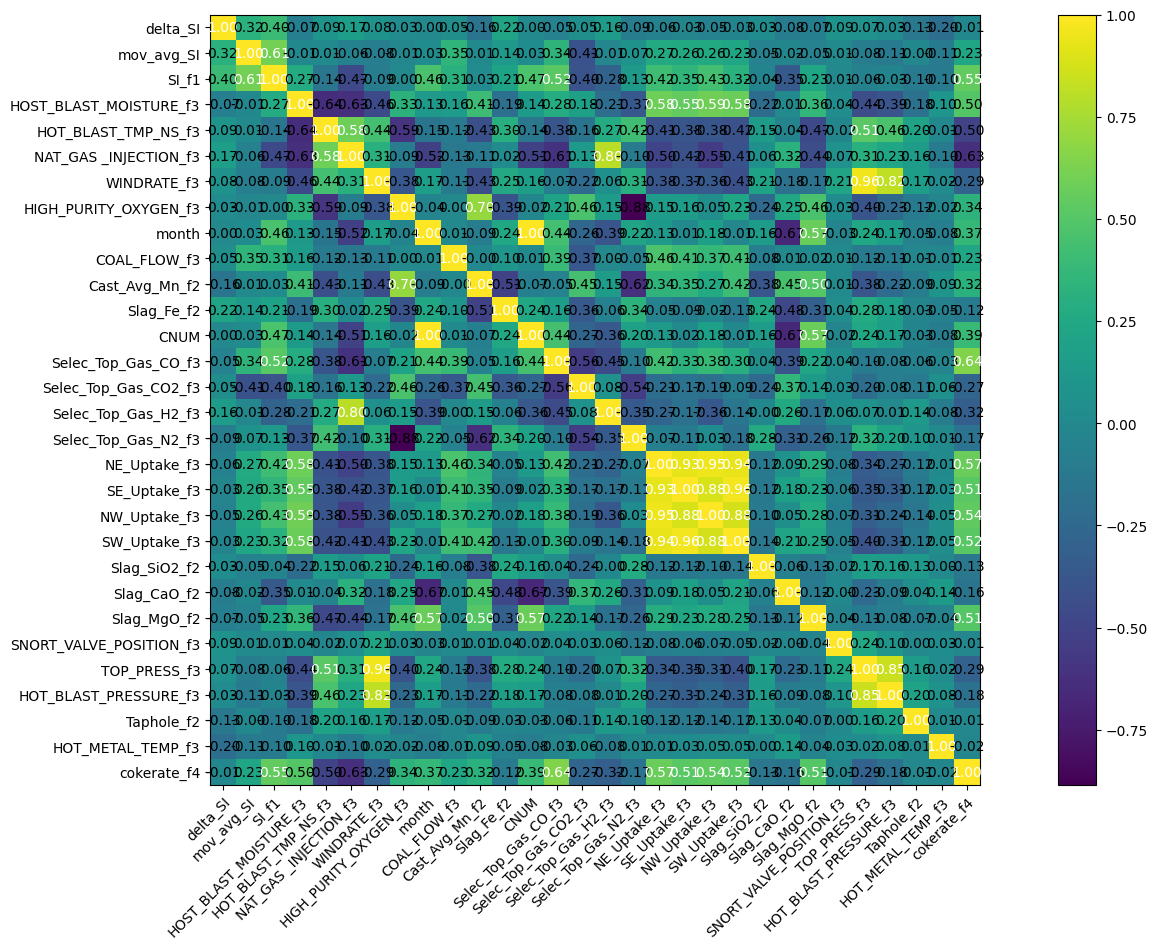

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


668



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.036307
Loss_SI: 1.1760765314102173 Loss_all: 1.1536535024642944
===
[200] Train Loss: 0.089404
Loss_SI: 0.35543322563171387 Loss_all: 0.3210299611091614
===
[400] Train Loss: 0.026921
Loss_SI: 0.396271675825119 Loss_all: 0.2942616939544678
===
[600] Train Loss: 0.022909
Loss_SI: 0.3485047221183777 Loss_all: 0.24511761963367462
===
[800] Train Loss: 0.030739
Loss_SI: 0.487373411655426 Loss_all: 0.3129097819328308
===


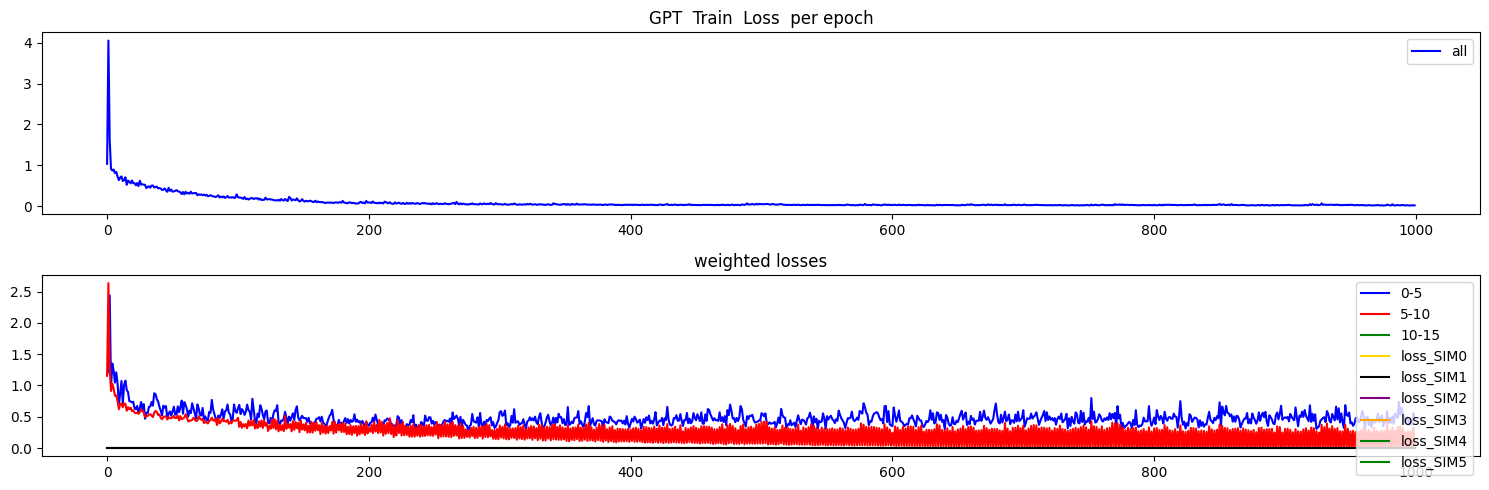

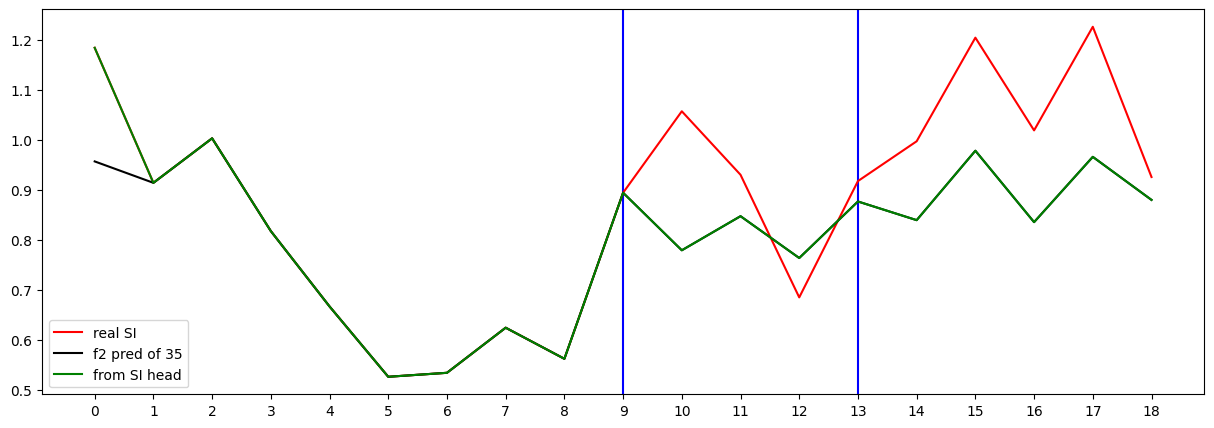

Testing R**2 - (all) - (no inputs):  0.23251319799174586
Testing R**2 - (f2) - SI full (no inputs):  -0.9321552755996441
Testing R**2 - SI head only (no inputs):  -0.9321552755996441
0 ...index R**2 (no inputs):  -1.3459141753299484
1 ...index R**2 (no inputs):  -3.0308688777597634
2 ...index R**2 (no inputs):  -0.9321552755996441
3 ...index R**2 (no inputs):  -1.5817978562249602
4 ...index R**2 (no inputs):  -0.9037366695062243
5 ...index R**2 (no inputs):  -3.455805294949748
6 ...index R**2 (no inputs):  -8.971571885982005
7 ...index R**2 (no inputs):  -8.326433167403467
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -5.191101963279712
10 ...index R**2 (no inputs):  -3.728568501991801
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8821845581498193
16 ...index R**2 (no inputs):  -0.40411575355897833
17 ...index R**2 (no inputs):  -92.561116241

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.171612
Loss_SI: 1.086342692375183 Loss_all: 1.2187161445617676
===
[200] Train Loss: 0.145152
Loss_SI: 0.4844920337200165 Loss_all: 0.32935789227485657
===
[400] Train Loss: 0.074610
Loss_SI: 0.2824115753173828 Loss_all: 0.2652316689491272
===
[600] Train Loss: 0.040108
Loss_SI: 0.31112322211265564 Loss_all: 0.26790711283683777
===
[800] Train Loss: 0.033490
Loss_SI: 0.32033535838127136 Loss_all: 0.25785624980926514
===


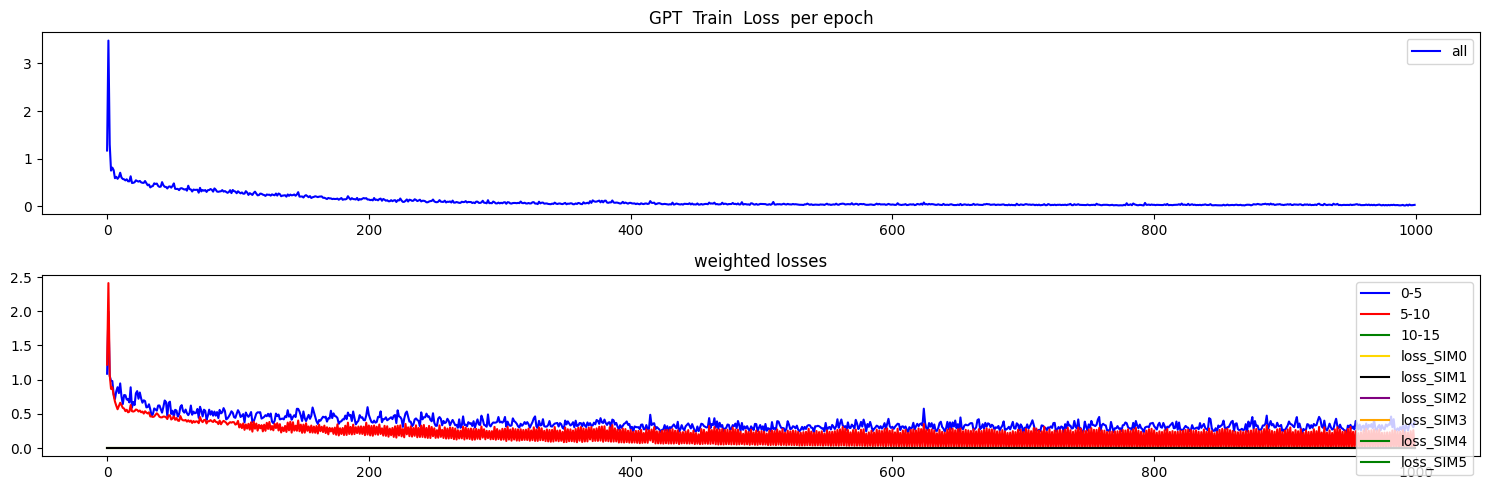

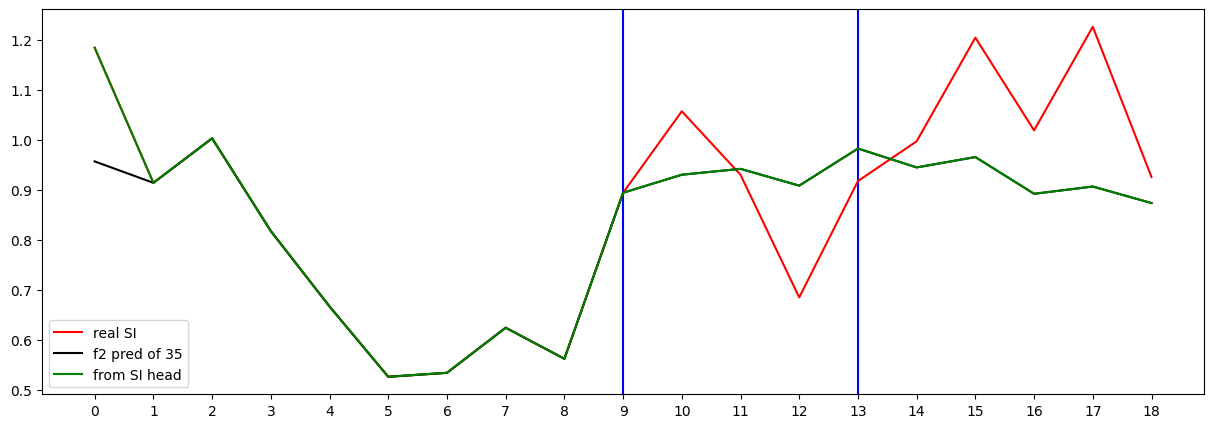

Testing R**2 - (all) - (no inputs):  0.30850747870042694
Testing R**2 - (f2) - SI full (no inputs):  -0.42081269643732244
Testing R**2 - SI head only (no inputs):  -0.42081269643732244
0 ...index R**2 (no inputs):  -0.5298398046140664
1 ...index R**2 (no inputs):  -0.9234538216079011
2 ...index R**2 (no inputs):  -0.42081269643732244
3 ...index R**2 (no inputs):  -0.6037934576566977
4 ...index R**2 (no inputs):  -0.7568998338255593
5 ...index R**2 (no inputs):  -3.012817092346242
6 ...index R**2 (no inputs):  -10.492375739181174
7 ...index R**2 (no inputs):  -8.86927673848009
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.5712948291561513
10 ...index R**2 (no inputs):  0.31003290992449173
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.698949817704434
16 ...index R**2 (no inputs):  -0.9964352028518015
17 ...index R**2 (no inputs):  -1007.9893

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.510648
Loss_SI: 1.6633853912353516 Loss_all: 1.267713189125061
===
[200] Train Loss: 0.190511
Loss_SI: 0.2711339294910431 Loss_all: 0.35663655400276184
===
[400] Train Loss: 0.084069
Loss_SI: 0.24296775460243225 Loss_all: 0.2537095546722412
===
[600] Train Loss: 0.082048
Loss_SI: 0.30494165420532227 Loss_all: 0.254285991191864
===
[800] Train Loss: 0.033796
Loss_SI: 0.20151057839393616 Loss_all: 0.20404523611068726
===


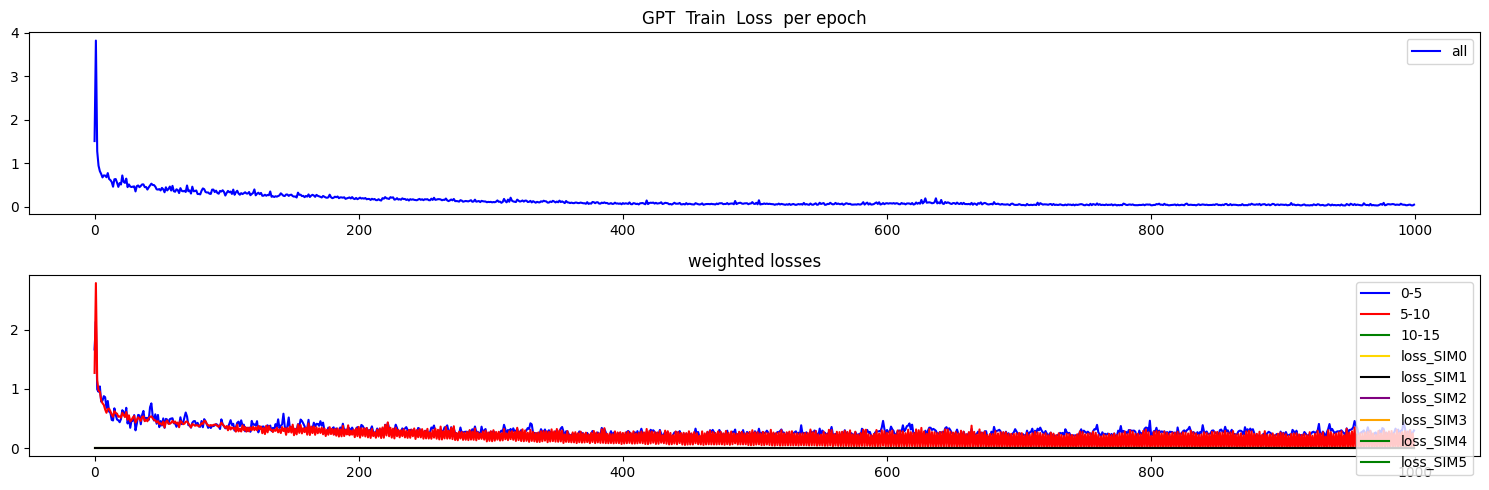

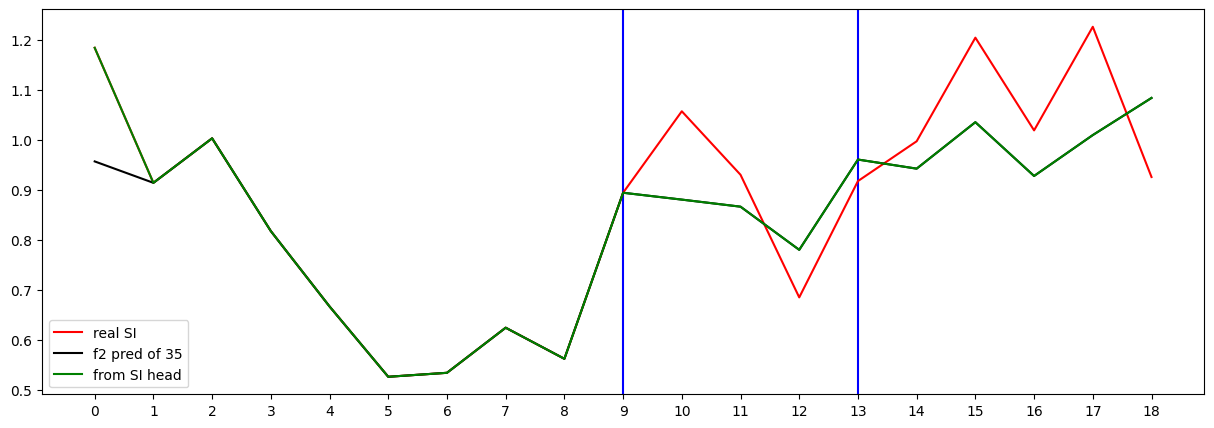

Testing R**2 - (all) - (no inputs):  0.03754883899259698
Testing R**2 - (f2) - SI full (no inputs):  0.049907361516406845
Testing R**2 - SI head only (no inputs):  0.049907361516406845
0 ...index R**2 (no inputs):  -0.6683419747476165
1 ...index R**2 (no inputs):  0.23771453166301393
2 ...index R**2 (no inputs):  0.049907361516406845
3 ...index R**2 (no inputs):  -0.9166595273603282
4 ...index R**2 (no inputs):  -1.1237956031100333
5 ...index R**2 (no inputs):  -4.589467261684799
6 ...index R**2 (no inputs):  -10.932484608175944
7 ...index R**2 (no inputs):  -5.289743031553914
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.1815730644690436
10 ...index R**2 (no inputs):  0.5602441992204968
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.20854825893644913
16 ...index R**2 (no inputs):  -0.8926399132098921
17 ...index R**2 (no inputs):  -28.4943

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.406693
Loss_SI: 1.6609947681427002 Loss_all: 1.304589867591858
===
[200] Train Loss: 0.251390
Loss_SI: 0.41193944215774536 Loss_all: 0.36793962121009827
===
[400] Train Loss: 0.111632
Loss_SI: 0.1926831752061844 Loss_all: 0.24562802910804749
===
[600] Train Loss: 0.082586
Loss_SI: 0.19368240237236023 Loss_all: 0.22601120173931122
===
[800] Train Loss: 0.060931
Loss_SI: 0.19073200225830078 Loss_all: 0.2527657747268677
===


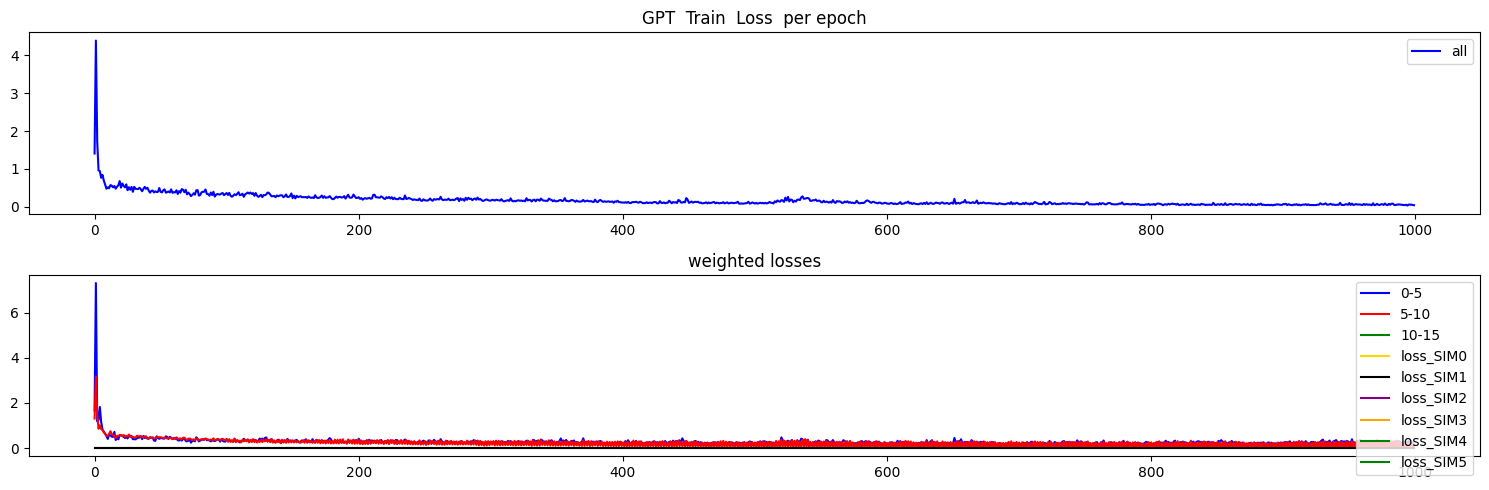

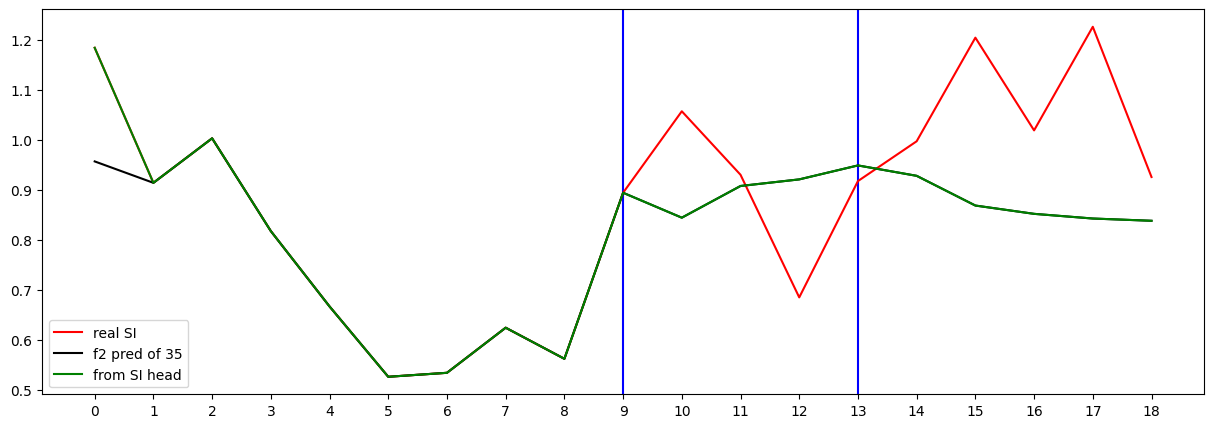

Testing R**2 - (all) - (no inputs):  0.6593215393686933
Testing R**2 - (f2) - SI full (no inputs):  -0.7501005748244072
Testing R**2 - SI head only (no inputs):  -0.7501005748244072
0 ...index R**2 (no inputs):  -0.22896637280811816
1 ...index R**2 (no inputs):  -1.2370958417591664
2 ...index R**2 (no inputs):  -0.7501005748244072
3 ...index R**2 (no inputs):  -0.42571412753779425
4 ...index R**2 (no inputs):  0.0094377213168787
5 ...index R**2 (no inputs):  -0.9629955489423874
6 ...index R**2 (no inputs):  -5.143642125293427
7 ...index R**2 (no inputs):  -12.993571565816868
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5827096304494952
10 ...index R**2 (no inputs):  -1.1326446910895922
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.5810011917934075
16 ...index R**2 (no inputs):  -1.5836664500175268
17 ...index R**2 (no inputs):  -9648.6596

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.321879
Loss_SI: 1.2592285871505737 Loss_all: 1.2278473377227783
===
[200] Train Loss: 0.109903
Loss_SI: 0.5116891264915466 Loss_all: 0.30475297570228577
===
[400] Train Loss: 0.024431
Loss_SI: 0.374066561460495 Loss_all: 0.22389404475688934
===
[600] Train Loss: 0.031127
Loss_SI: 0.33259615302085876 Loss_all: 0.23191246390342712
===
[800] Train Loss: 0.019576
Loss_SI: 0.3225677013397217 Loss_all: 0.2369672954082489
===


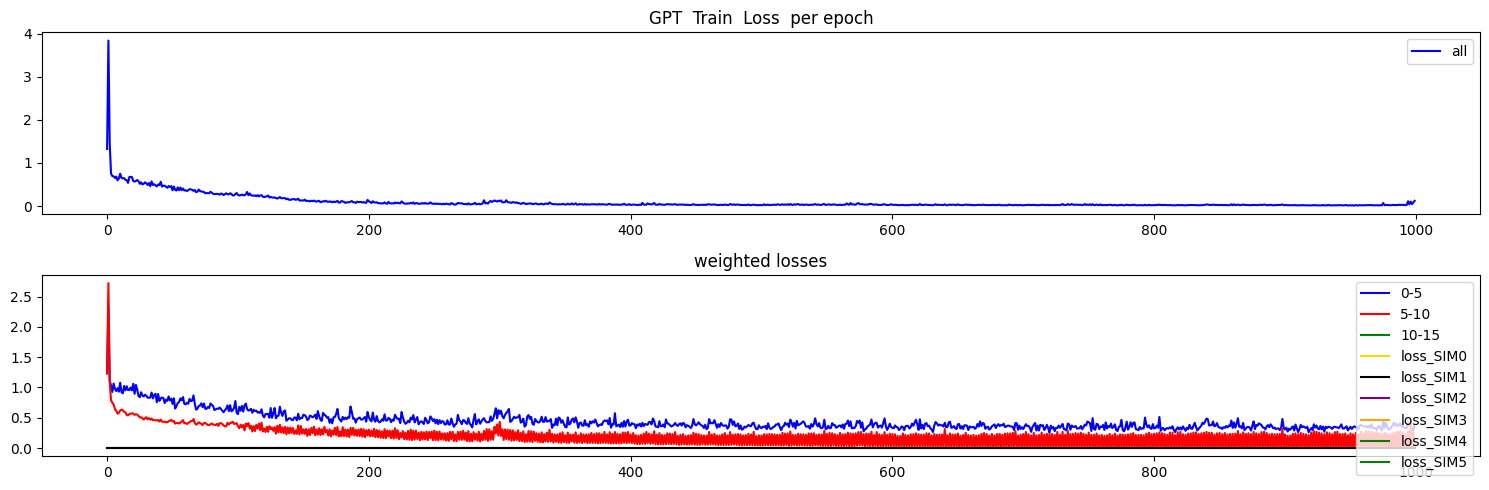

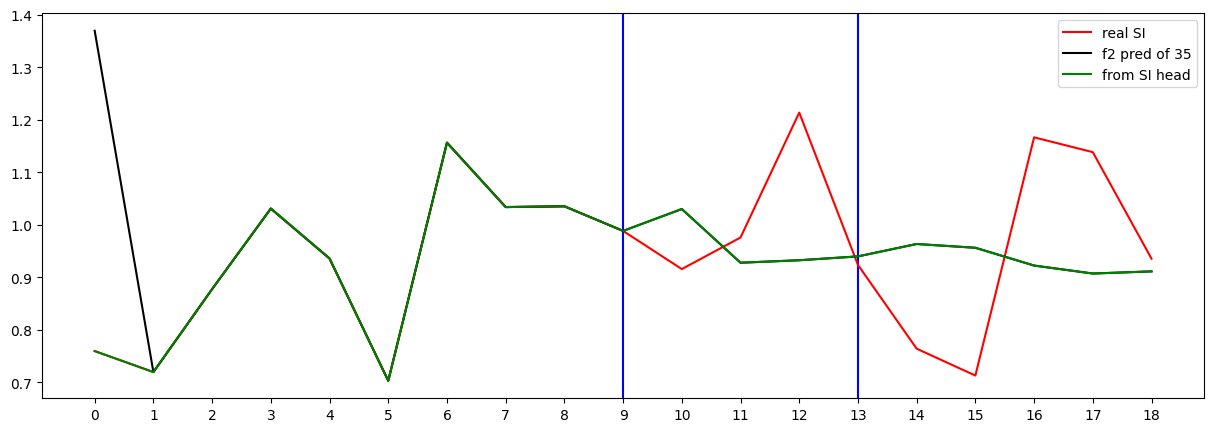

Testing R**2 - (all) - (no inputs):  0.9911990367206317
Testing R**2 - (f2) - SI full (no inputs):  -0.045532781279118195
Testing R**2 - SI head only (no inputs):  -0.045532781279118195
0 ...index R**2 (no inputs):  -0.14753574210759823
1 ...index R**2 (no inputs):  0.006861281940106045
2 ...index R**2 (no inputs):  -0.045532781279118195
3 ...index R**2 (no inputs):  -1.7915468269360275
4 ...index R**2 (no inputs):  -4.330206558906226
5 ...index R**2 (no inputs):  -3.1357622598985344
6 ...index R**2 (no inputs):  -970.2040645286806
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6264553686121432
10 ...index R**2 (no inputs):  -0.32028169910144544
11 ...index R**2 (no inputs):  -32.74256411008264
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.517549527727902
16 ...index R**2 (no inputs):  -0.18792233817755588
17 ...index R**2 (no inputs):  -167

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.222436
Loss_SI: 1.3926509618759155 Loss_all: 1.2671880722045898
===
[200] Train Loss: 0.150465
Loss_SI: 0.24870124459266663 Loss_all: 0.29704633355140686
===
[400] Train Loss: 0.080593
Loss_SI: 0.2375272810459137 Loss_all: 0.26961493492126465
===
[600] Train Loss: 0.045239
Loss_SI: 0.25144296884536743 Loss_all: 0.2593510150909424
===
[800] Train Loss: 0.033565
Loss_SI: 0.23347358405590057 Loss_all: 0.21747684478759766
===


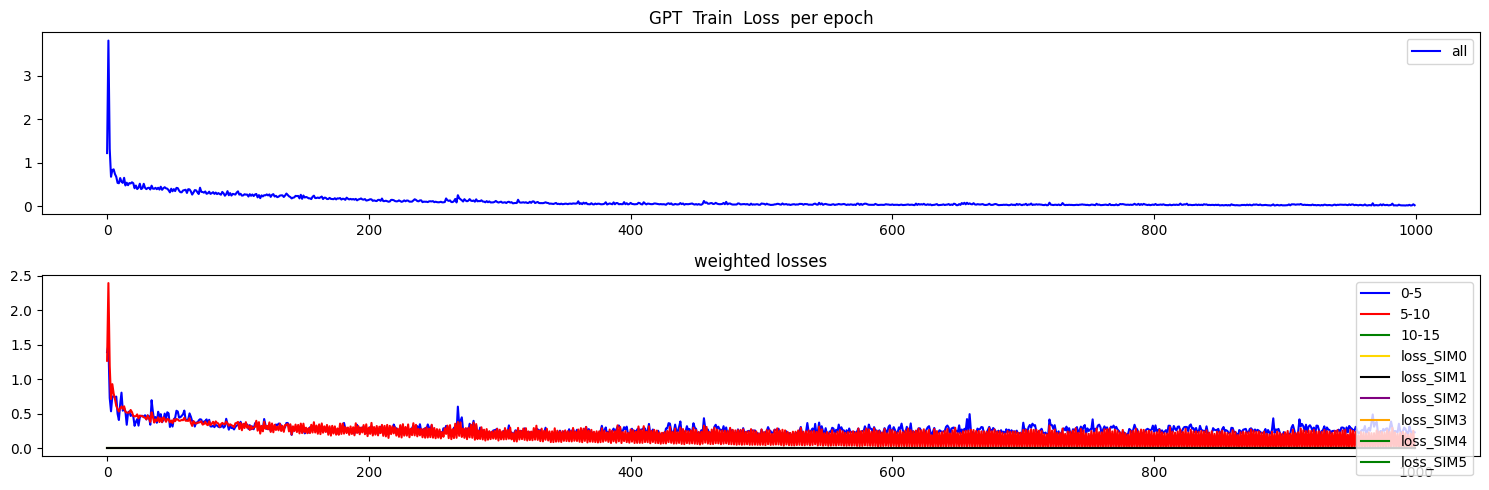

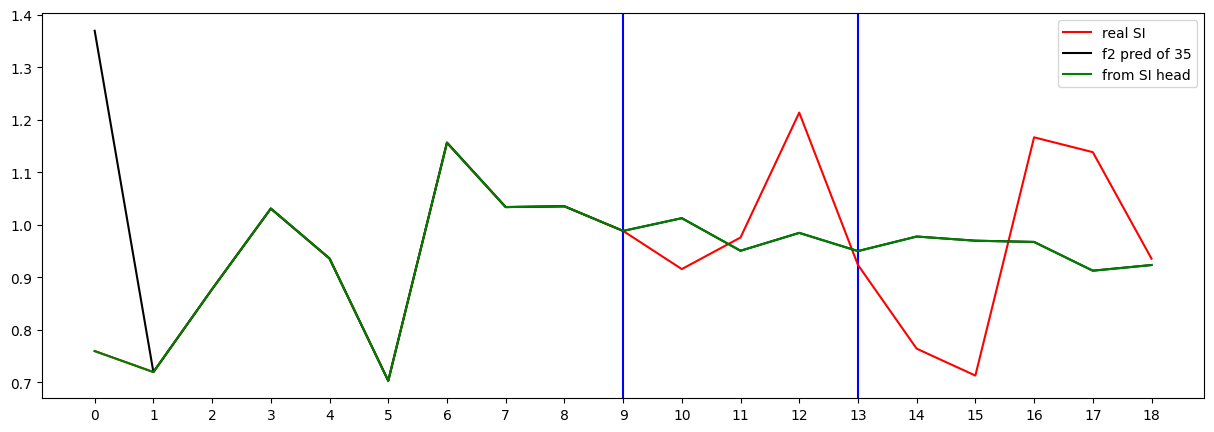

Testing R**2 - (all) - (no inputs):  0.9487116976730778
Testing R**2 - (f2) - SI full (no inputs):  0.021551913700402547
Testing R**2 - SI head only (no inputs):  0.021551913700402547
0 ...index R**2 (no inputs):  -0.06280429213510663
1 ...index R**2 (no inputs):  -0.1643307846182256
2 ...index R**2 (no inputs):  0.021551913700402547
3 ...index R**2 (no inputs):  -1.4272172924113105
4 ...index R**2 (no inputs):  -5.433173225525183
5 ...index R**2 (no inputs):  -23.21926359812704
6 ...index R**2 (no inputs):  -31.07131661866122
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.540452837868534
10 ...index R**2 (no inputs):  0.022770801364705218
11 ...index R**2 (no inputs):  -76.59465022486575
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9815727394321194
16 ...index R**2 (no inputs):  -0.32710432392787103
17 ...index R**2 (no inputs):  -109.4578

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.162572
Loss_SI: 2.0994129180908203 Loss_all: 1.278143286705017
===
[200] Train Loss: 0.248263
Loss_SI: 0.28589966893196106 Loss_all: 0.2924913763999939
===
[400] Train Loss: 0.093773
Loss_SI: 0.24416258931159973 Loss_all: 0.23081232607364655
===
[600] Train Loss: 0.059062
Loss_SI: 0.2219175398349762 Loss_all: 0.27231118083000183
===
[800] Train Loss: 0.095635
Loss_SI: 0.21822097897529602 Loss_all: 0.24080653488636017
===


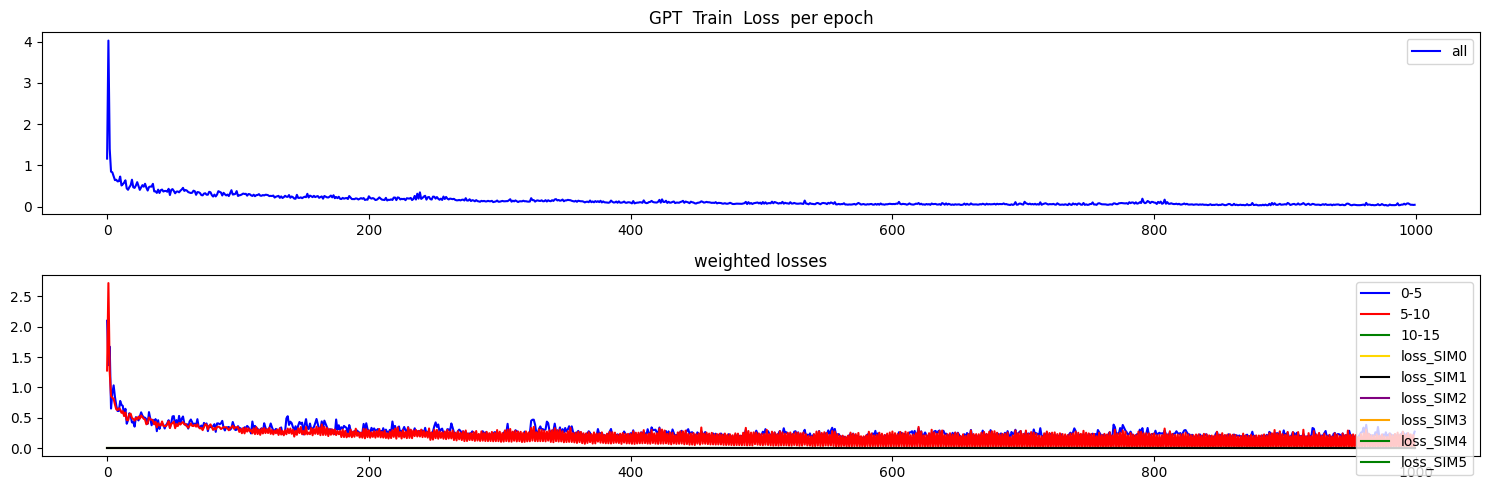

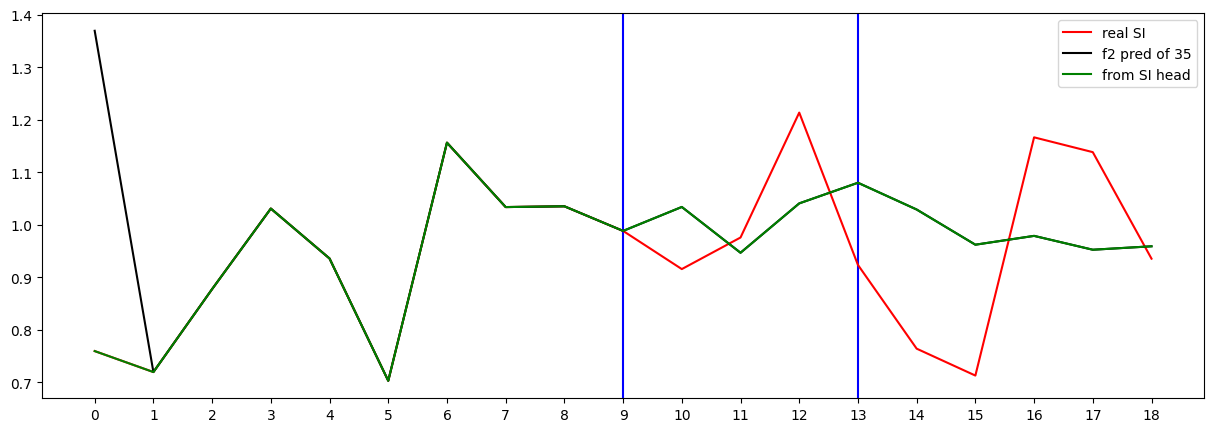

Testing R**2 - (all) - (no inputs):  0.9189239207945019
Testing R**2 - (f2) - SI full (no inputs):  -0.4107764963052678
Testing R**2 - SI head only (no inputs):  -0.4107764963052678
0 ...index R**2 (no inputs):  -0.27295328939153585
1 ...index R**2 (no inputs):  -0.9902834012883213
2 ...index R**2 (no inputs):  -0.4107764963052678
3 ...index R**2 (no inputs):  -2.66627622164934
4 ...index R**2 (no inputs):  -6.8991230202326355
5 ...index R**2 (no inputs):  -37.157158250219574
6 ...index R**2 (no inputs):  -35.93165994089159
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1649607150444432
10 ...index R**2 (no inputs):  -0.15966516213901816
11 ...index R**2 (no inputs):  -31.849705714601036
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.14823810308623742
16 ...index R**2 (no inputs):  -0.6670981980586861
17 ...index R**2 (no inputs):  -2622.9966

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.188568
Loss_SI: 1.2149441242218018 Loss_all: 1.266987681388855
===
[200] Train Loss: 0.225277
Loss_SI: 0.25200578570365906 Loss_all: 0.3292241096496582
===
[400] Train Loss: 0.123846
Loss_SI: 0.16224174201488495 Loss_all: 0.23556232452392578
===
[600] Train Loss: 0.085858
Loss_SI: 0.1613091230392456 Loss_all: 0.2103368639945984
===
[800] Train Loss: 0.049963
Loss_SI: 0.17834635078907013 Loss_all: 0.20234926044940948
===


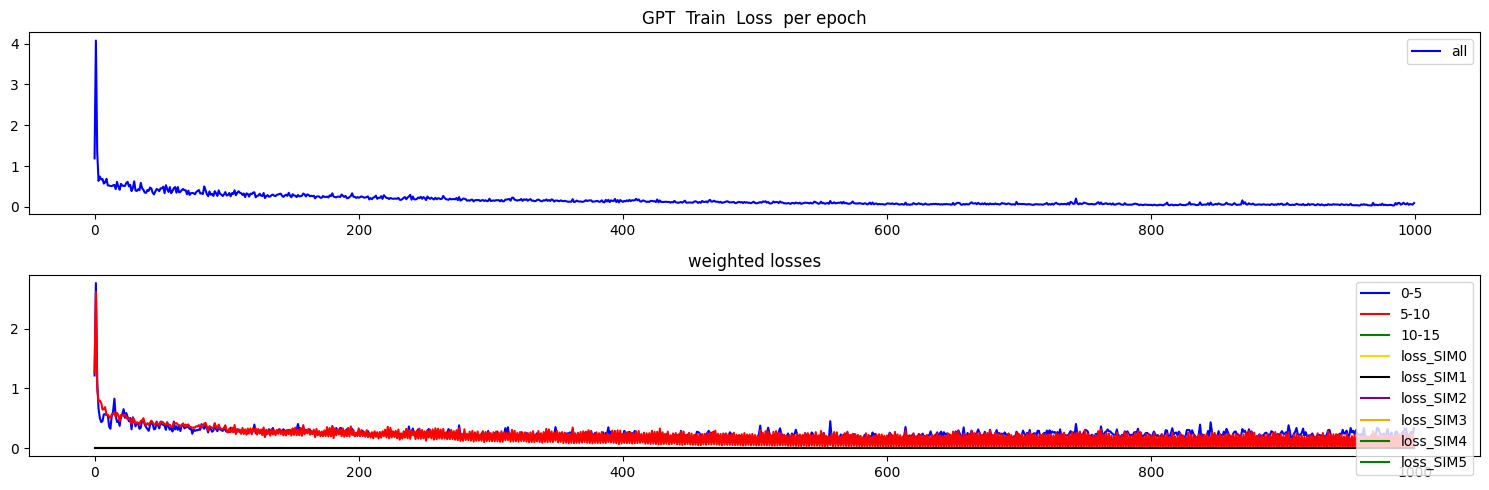

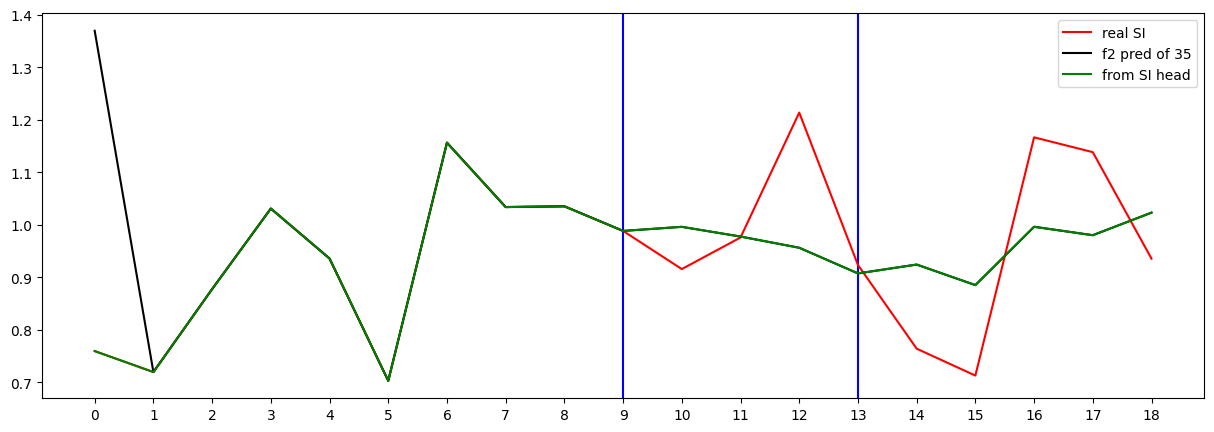

Testing R**2 - (all) - (no inputs):  0.9118644404293453
Testing R**2 - (f2) - SI full (no inputs):  -0.04627402182442086
Testing R**2 - SI head only (no inputs):  -0.04627402182442086
0 ...index R**2 (no inputs):  -0.2710268526685571
1 ...index R**2 (no inputs):  -0.2806114638932795
2 ...index R**2 (no inputs):  -0.04627402182442086
3 ...index R**2 (no inputs):  0.16485341986423163
4 ...index R**2 (no inputs):  -12.793818542598416
5 ...index R**2 (no inputs):  -40.63071370380974
6 ...index R**2 (no inputs):  -45.769416901489706
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4853256689437664
10 ...index R**2 (no inputs):  -0.43130823944168006
11 ...index R**2 (no inputs):  -168.11369080175757
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.2892876313075594
16 ...index R**2 (no inputs):  -0.4166443670904578
17 ...index R**2 (no inputs):  -369.26

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.089988
Loss_SI: 1.1821346282958984 Loss_all: 1.1523818969726562
===
[200] Train Loss: 0.050013
Loss_SI: 0.5298194289207458 Loss_all: 0.32846495509147644
===
[400] Train Loss: 0.024168
Loss_SI: 0.602116584777832 Loss_all: 0.375512957572937
===
[600] Train Loss: 0.018342
Loss_SI: 0.44749292731285095 Loss_all: 0.31582510471343994
===
[800] Train Loss: 0.018683
Loss_SI: 0.5766952037811279 Loss_all: 0.4092141389846802
===


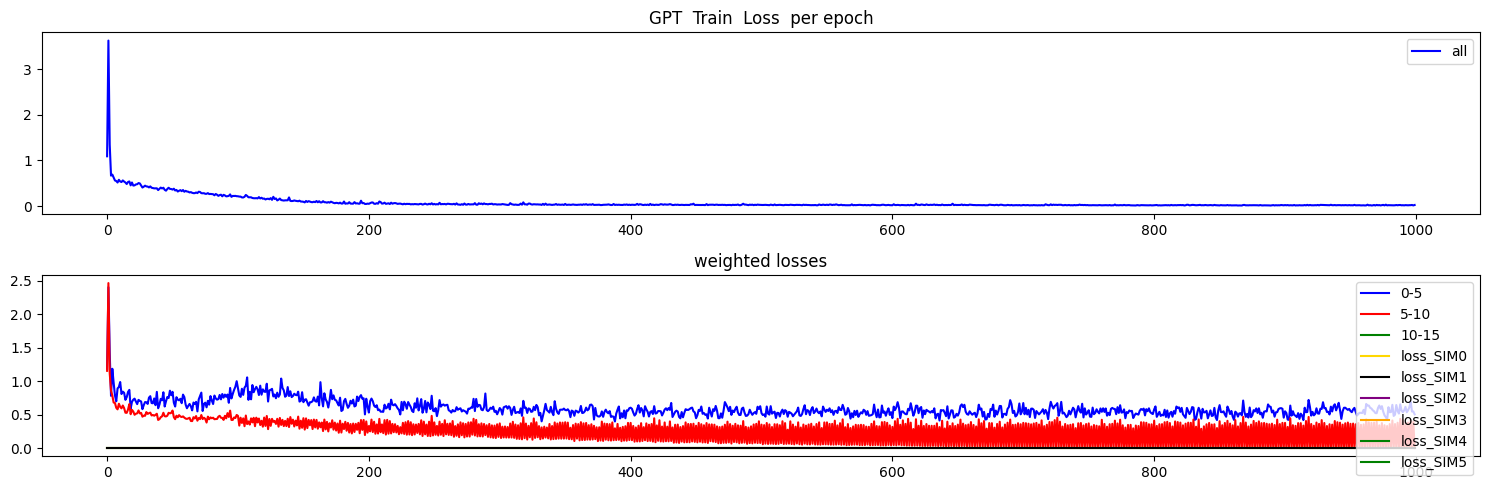

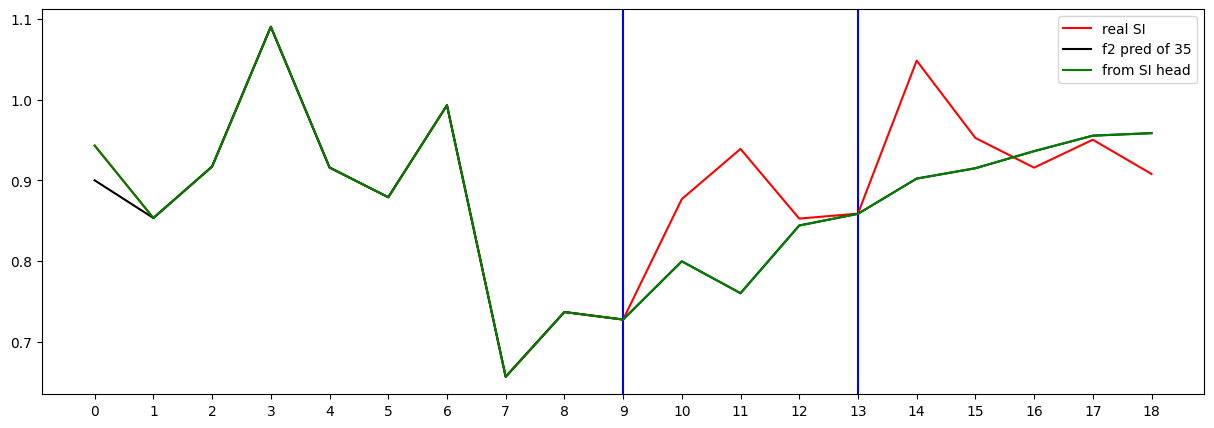

Testing R**2 - (all) - (no inputs):  0.9916562349893169
Testing R**2 - (f2) - SI full (no inputs):  -1.5776046067461142
Testing R**2 - SI head only (no inputs):  -1.5776046067461142
0 ...index R**2 (no inputs):  -0.05173083854382887
1 ...index R**2 (no inputs):  -0.4143421047025855
2 ...index R**2 (no inputs):  -1.5776046067461142
3 ...index R**2 (no inputs):  -62.57988733455228
4 ...index R**2 (no inputs):  -111.65724665303236
5 ...index R**2 (no inputs):  -196.07246854508287
6 ...index R**2 (no inputs):  -106.77285622855317
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.108375552851233
10 ...index R**2 (no inputs):  0.5040226980873086
11 ...index R**2 (no inputs):  -172.34081550450347
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -35.60472950453021
16 ...index R**2 (no inputs):  -1.9826987816537058
17 ...index R**2 (no inputs):  -394.47227388

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.132891
Loss_SI: 1.2192864418029785 Loss_all: 1.1967849731445312
===
[200] Train Loss: 0.120318
Loss_SI: 0.4432302415370941 Loss_all: 0.3410680294036865
===
[400] Train Loss: 0.047732
Loss_SI: 0.3450324535369873 Loss_all: 0.26305854320526123
===
[600] Train Loss: 0.041921
Loss_SI: 0.2973986566066742 Loss_all: 0.26444685459136963
===
[800] Train Loss: 0.029133
Loss_SI: 0.36819902062416077 Loss_all: 0.27155181765556335
===


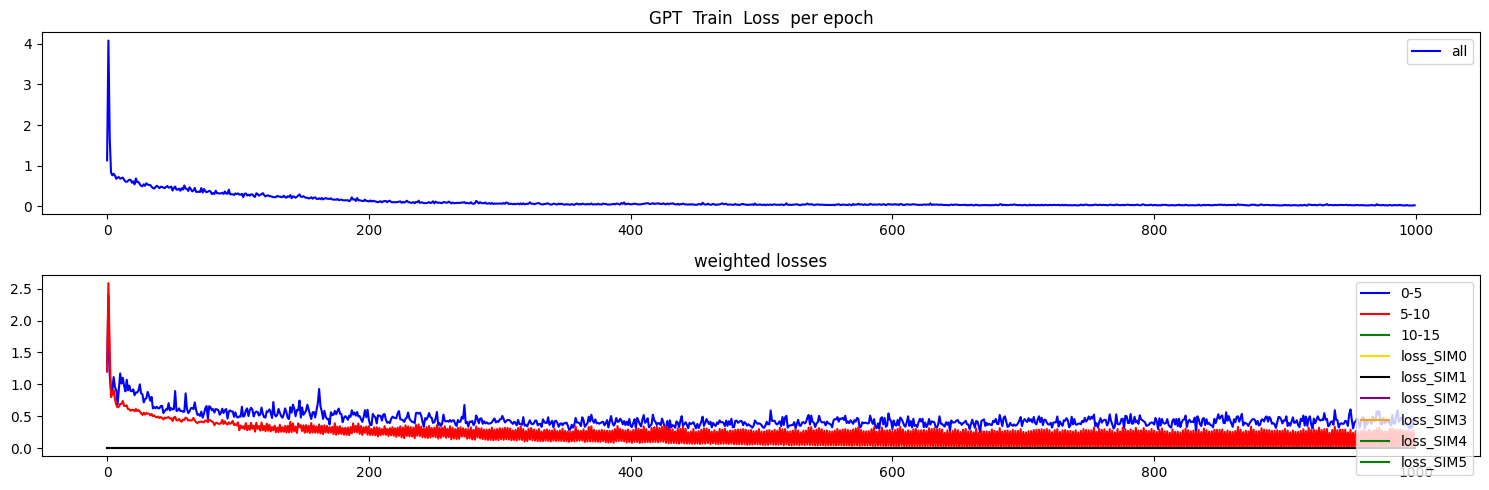

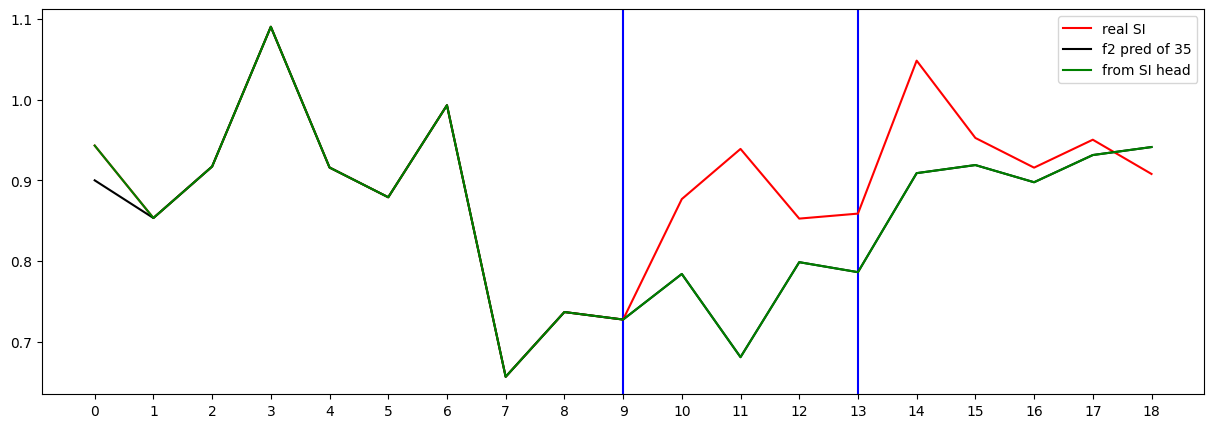

Testing R**2 - (all) - (no inputs):  0.9974160330029934
Testing R**2 - (f2) - SI full (no inputs):  -3.8658517978750915
Testing R**2 - SI head only (no inputs):  -3.8658517978750915
0 ...index R**2 (no inputs):  -0.9458299555530436
1 ...index R**2 (no inputs):  -0.44739948464615176
2 ...index R**2 (no inputs):  -3.8658517978750915
3 ...index R**2 (no inputs):  -358.5813292021923
4 ...index R**2 (no inputs):  -27.078538688563288
5 ...index R**2 (no inputs):  -57.66000211970159
6 ...index R**2 (no inputs):  -315.5686477936519
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.7827486886511625
10 ...index R**2 (no inputs):  0.582879493598544
11 ...index R**2 (no inputs):  -185.84855000449048
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -30.229845188306047
16 ...index R**2 (no inputs):  -2.2495643492973527
17 ...index R**2 (no inputs):  -491.435650866

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.274545
Loss_SI: 1.2241805791854858 Loss_all: 1.195556879043579
===
[200] Train Loss: 0.214276
Loss_SI: 0.4226857125759125 Loss_all: 0.3352169096469879
===
[400] Train Loss: 0.070656
Loss_SI: 0.3903621733188629 Loss_all: 0.29104024171829224
===
[600] Train Loss: 0.040921
Loss_SI: 0.27801844477653503 Loss_all: 0.22463221848011017
===
[800] Train Loss: 0.032339
Loss_SI: 0.23071041703224182 Loss_all: 0.19828087091445923
===


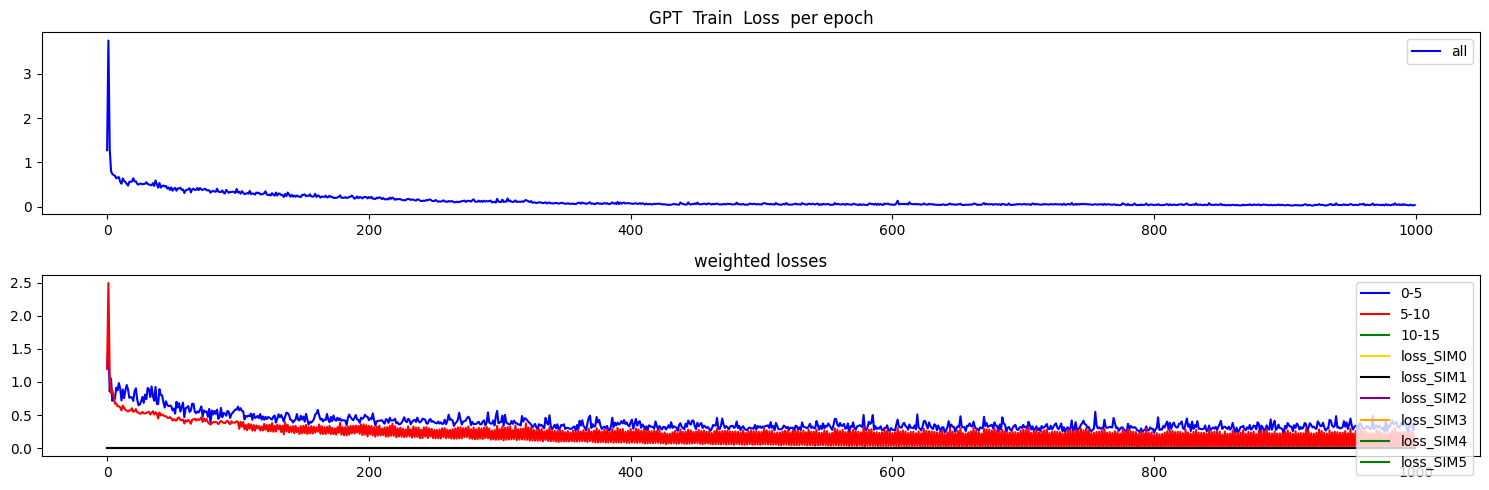

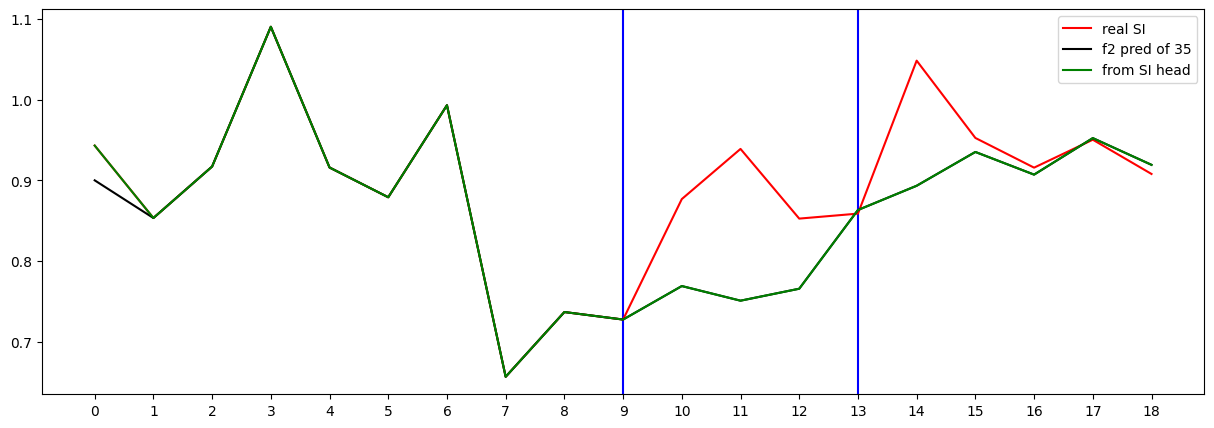

Testing R**2 - (all) - (no inputs):  0.9492253590262335
Testing R**2 - (f2) - SI full (no inputs):  -2.3581649643851046
Testing R**2 - SI head only (no inputs):  -2.3581649643851046
0 ...index R**2 (no inputs):  -0.16136856060312854
1 ...index R**2 (no inputs):  -0.3655064355396038
2 ...index R**2 (no inputs):  -2.3581649643851046
3 ...index R**2 (no inputs):  -56.49538704339334
4 ...index R**2 (no inputs):  -15.976971637172934
5 ...index R**2 (no inputs):  -1204.3058730902912
6 ...index R**2 (no inputs):  -442.1268538582425
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.15621777713918
10 ...index R**2 (no inputs):  0.14469047992014006
11 ...index R**2 (no inputs):  -15.929633533464873
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -32.0103803916413
16 ...index R**2 (no inputs):  -2.2935330321432623
17 ...index R**2 (no inputs):  -1833.209411471

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.178149
Loss_SI: 1.7217848300933838 Loss_all: 1.2987275123596191
===
[200] Train Loss: 0.213835
Loss_SI: 0.310445636510849 Loss_all: 0.29562339186668396
===
[400] Train Loss: 0.096590
Loss_SI: 0.2304292470216751 Loss_all: 0.24994245171546936
===
[600] Train Loss: 0.057104
Loss_SI: 0.29512158036231995 Loss_all: 0.27842292189598083
===
[800] Train Loss: 0.042827
Loss_SI: 0.2588973343372345 Loss_all: 0.269813597202301
===


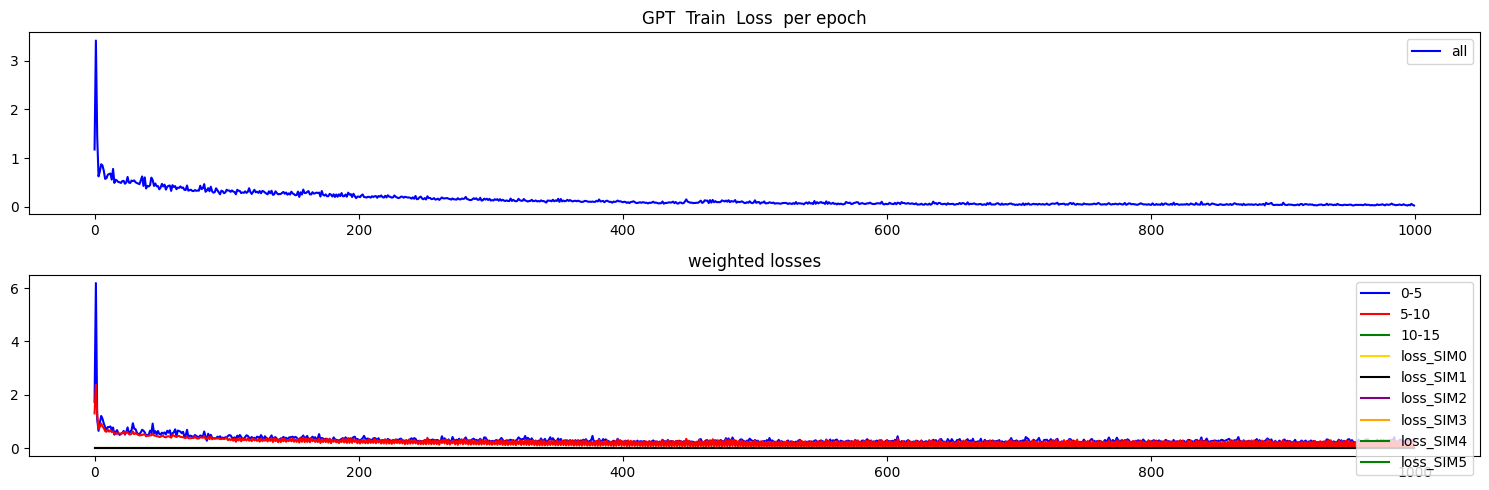

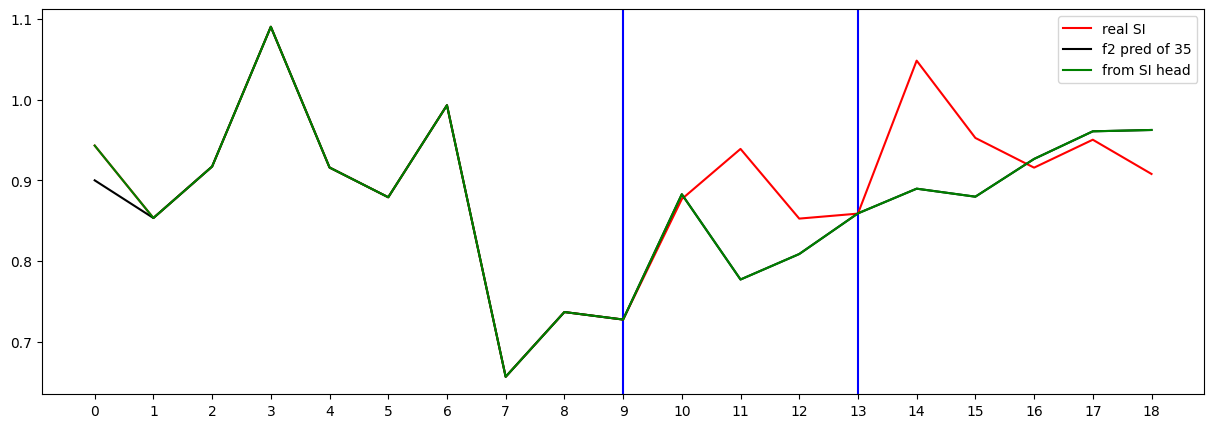

Testing R**2 - (all) - (no inputs):  0.903421366775725
Testing R**2 - (f2) - SI full (no inputs):  -1.085027867405533
Testing R**2 - SI head only (no inputs):  -1.085027867405533
0 ...index R**2 (no inputs):  0.09480419978322274
1 ...index R**2 (no inputs):  0.17855855246884034
2 ...index R**2 (no inputs):  -1.085027867405533
3 ...index R**2 (no inputs):  -326.0706806338557
4 ...index R**2 (no inputs):  -161.66589766435607
5 ...index R**2 (no inputs):  -2293.2159094978356
6 ...index R**2 (no inputs):  -1169.8101017818487
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.579584575499551
10 ...index R**2 (no inputs):  0.40288444602886875
11 ...index R**2 (no inputs):  -159.05137941317827
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -28.063916863885993
16 ...index R**2 (no inputs):  -2.1111599801219203
17 ...index R**2 (no inputs):  -3428.1650169587

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.082739
Loss_SI: 1.367019534111023 Loss_all: 1.1046643257141113
===
[200] Train Loss: 0.075340
Loss_SI: 0.8399264216423035 Loss_all: 0.3524908423423767
===
[400] Train Loss: 0.028607
Loss_SI: 0.4344106614589691 Loss_all: 0.2804862856864929
===
[600] Train Loss: 0.029369
Loss_SI: 0.41834402084350586 Loss_all: 0.2915318012237549
===
[800] Train Loss: 0.029425
Loss_SI: 0.35269269347190857 Loss_all: 0.2852935194969177
===


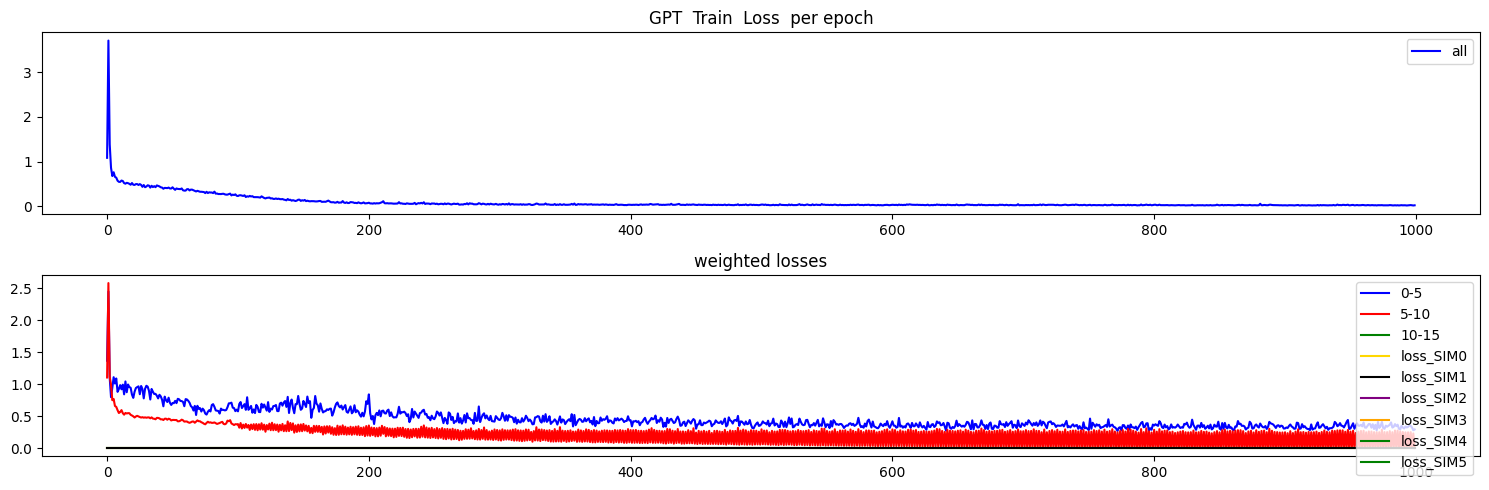

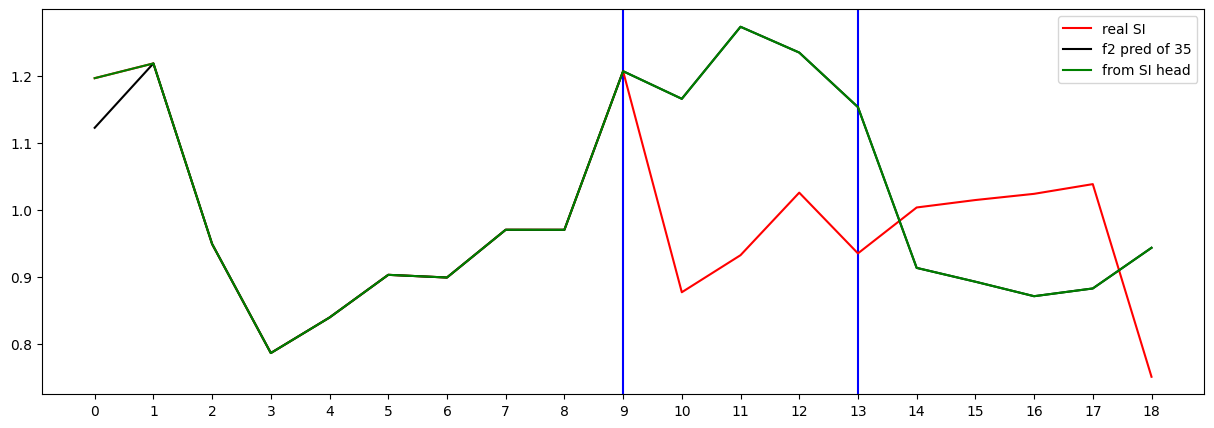

Testing R**2 - (all) - (no inputs):  0.9928713920489827
Testing R**2 - (f2) - SI full (no inputs):  -2.266148798568174
Testing R**2 - SI head only (no inputs):  -2.266148798568174
0 ...index R**2 (no inputs):  -0.3333816465531645
1 ...index R**2 (no inputs):  -0.7989308865730111
2 ...index R**2 (no inputs):  -2.266148798568174
3 ...index R**2 (no inputs):  -3.363024934277626
4 ...index R**2 (no inputs):  -0.6879621039469015
5 ...index R**2 (no inputs):  -1.330527113888608
6 ...index R**2 (no inputs):  -4.344223539030709
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.0060003232783212
10 ...index R**2 (no inputs):  0.4081378416517363
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -45.856973804759825
16 ...index R**2 (no inputs):  -1.4344505929127824
17 ...index R**2 (no inputs):  -19.86621487250806
18 ...index R*

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.219662
Loss_SI: 1.701882243156433 Loss_all: 1.2589960098266602
===
[200] Train Loss: 0.123518
Loss_SI: 0.6870931386947632 Loss_all: 0.35504892468452454
===
[400] Train Loss: 0.045109
Loss_SI: 0.3595771789550781 Loss_all: 0.27820873260498047
===
[600] Train Loss: 0.057328
Loss_SI: 0.3153547942638397 Loss_all: 0.324196994304657
===
[800] Train Loss: 0.032985
Loss_SI: 0.35446739196777344 Loss_all: 0.32643869519233704
===


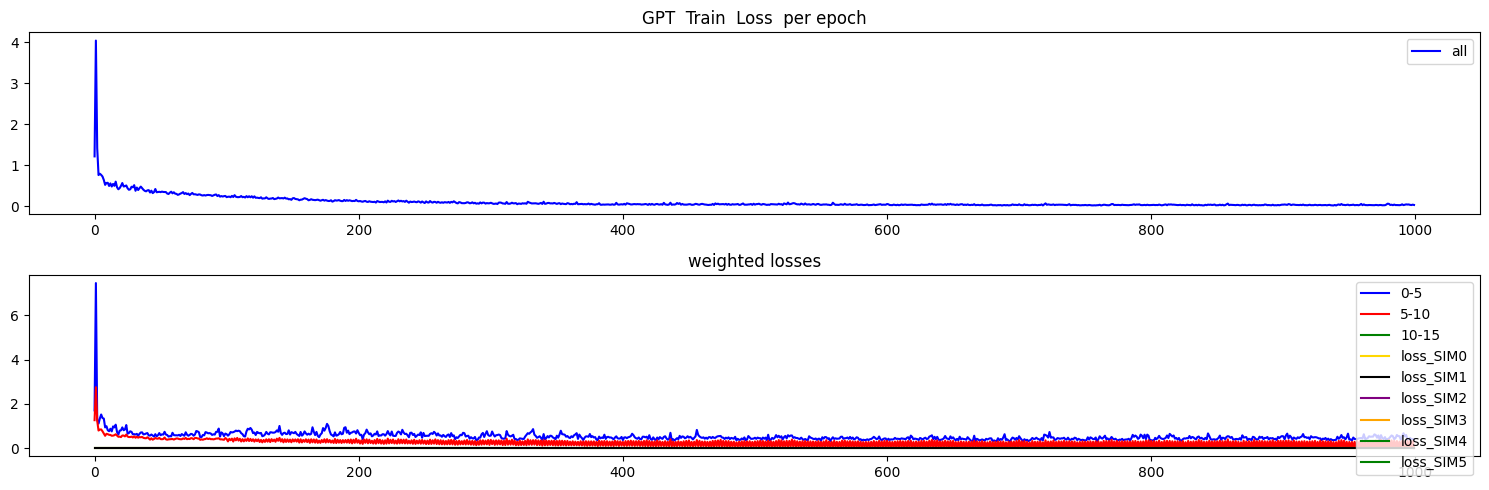

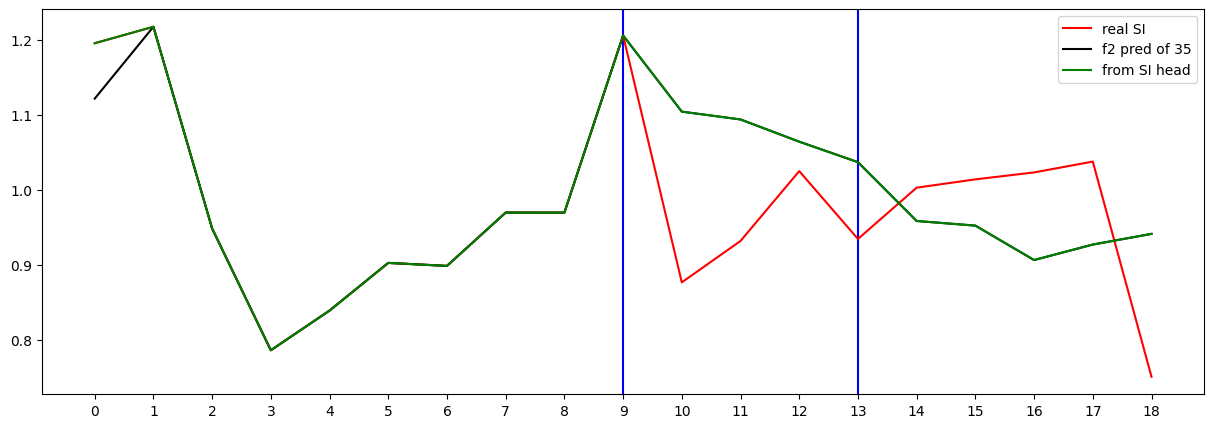

Testing R**2 - (all) - (no inputs):  0.9965773785080412
Testing R**2 - (f2) - SI full (no inputs):  -0.559319517481333
Testing R**2 - SI head only (no inputs):  -0.559319517481333
0 ...index R**2 (no inputs):  0.010797086315270765
1 ...index R**2 (no inputs):  0.06610159318553499
2 ...index R**2 (no inputs):  -0.559319517481333
3 ...index R**2 (no inputs):  -6.233341156147955
4 ...index R**2 (no inputs):  -4.063130862069052
5 ...index R**2 (no inputs):  -0.11657499502349711
6 ...index R**2 (no inputs):  -3.6917820488324944
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.27966722459821547
10 ...index R**2 (no inputs):  0.41519495022031094
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -26.481734634771858
16 ...index R**2 (no inputs):  -1.5450017198489934
17 ...index R**2 (no inputs):  -5.737932542572732
18 ...ind

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.319066
Loss_SI: 1.8418878316879272 Loss_all: 1.2046146392822266
===
[200] Train Loss: 0.188450
Loss_SI: 0.5326517224311829 Loss_all: 0.31593939661979675
===
[400] Train Loss: 0.088340
Loss_SI: 0.48108920454978943 Loss_all: 0.29336032271385193
===
[600] Train Loss: 0.077194
Loss_SI: 0.532961905002594 Loss_all: 0.3361278176307678
===
[800] Train Loss: 0.036469
Loss_SI: 0.3604283034801483 Loss_all: 0.24333125352859497
===


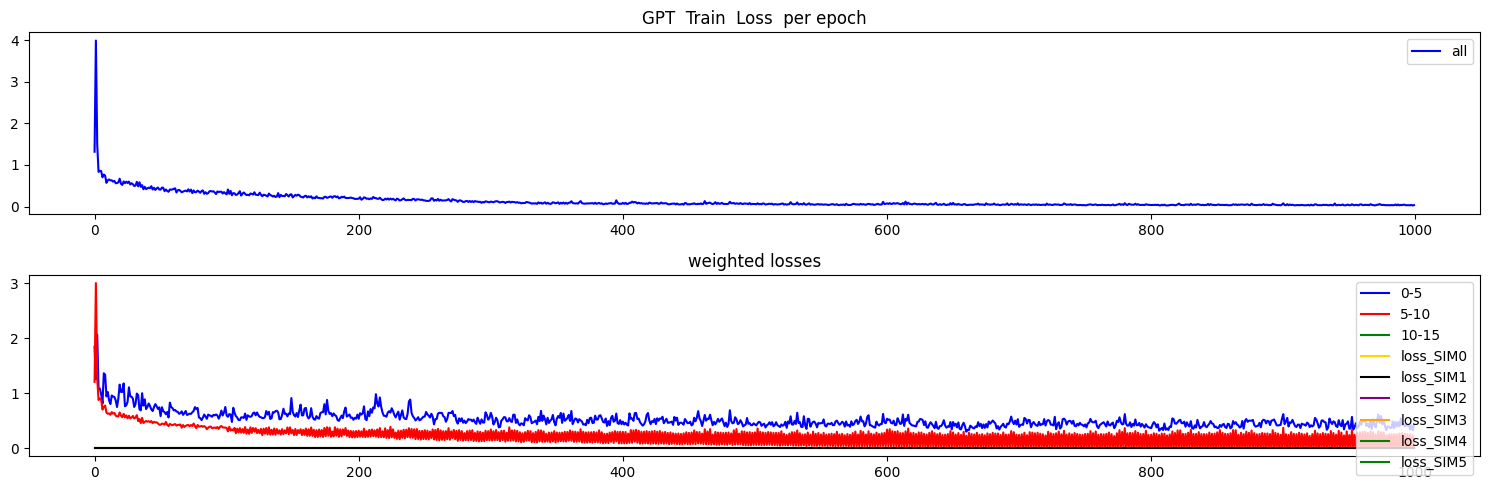

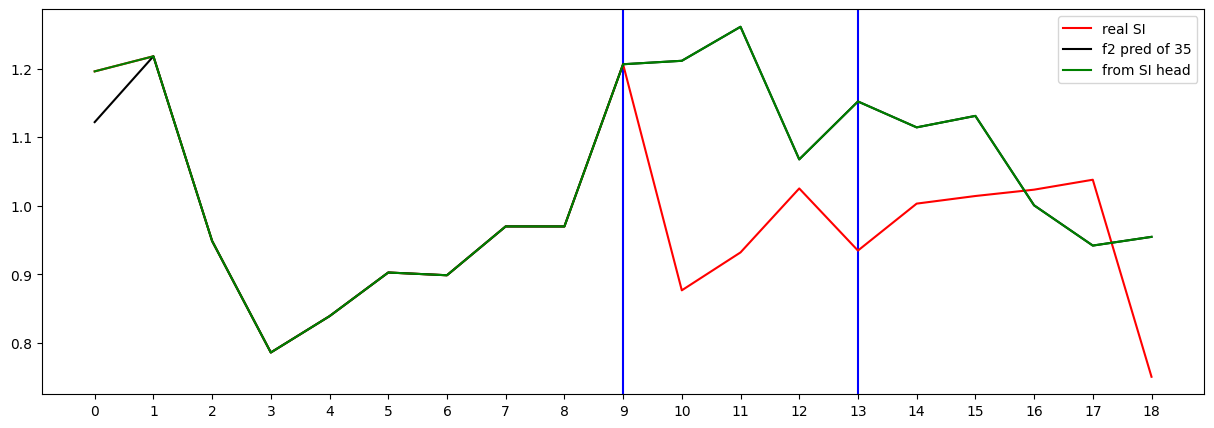

Testing R**2 - (all) - (no inputs):  0.995664732933348
Testing R**2 - (f2) - SI full (no inputs):  -1.6113246798239338
Testing R**2 - SI head only (no inputs):  -1.6113246798239338
0 ...index R**2 (no inputs):  0.06468915513429452
1 ...index R**2 (no inputs):  0.12330605100325598
2 ...index R**2 (no inputs):  -1.6113246798239338
3 ...index R**2 (no inputs):  -84.64709213712682
4 ...index R**2 (no inputs):  -3.237867853398374
5 ...index R**2 (no inputs):  -0.4138640638110467
6 ...index R**2 (no inputs):  -6.319405006065123
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.33262021710868894
10 ...index R**2 (no inputs):  0.01923509130307599
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -39.781535165300895
16 ...index R**2 (no inputs):  -1.780709664605928
17 ...index R**2 (no inputs):  -50.76271189314834
18 ...index

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.142525
Loss_SI: 0.9104610681533813 Loss_all: 1.2126935720443726
===
[200] Train Loss: 0.247775
Loss_SI: 0.3815508782863617 Loss_all: 0.3252665400505066
===
[400] Train Loss: 0.092642
Loss_SI: 0.30270060896873474 Loss_all: 0.30153581500053406
===
[600] Train Loss: 0.094945
Loss_SI: 0.3621599078178406 Loss_all: 0.3423520624637604
===
[800] Train Loss: 0.051266
Loss_SI: 0.2647920250892639 Loss_all: 0.24529746174812317
===


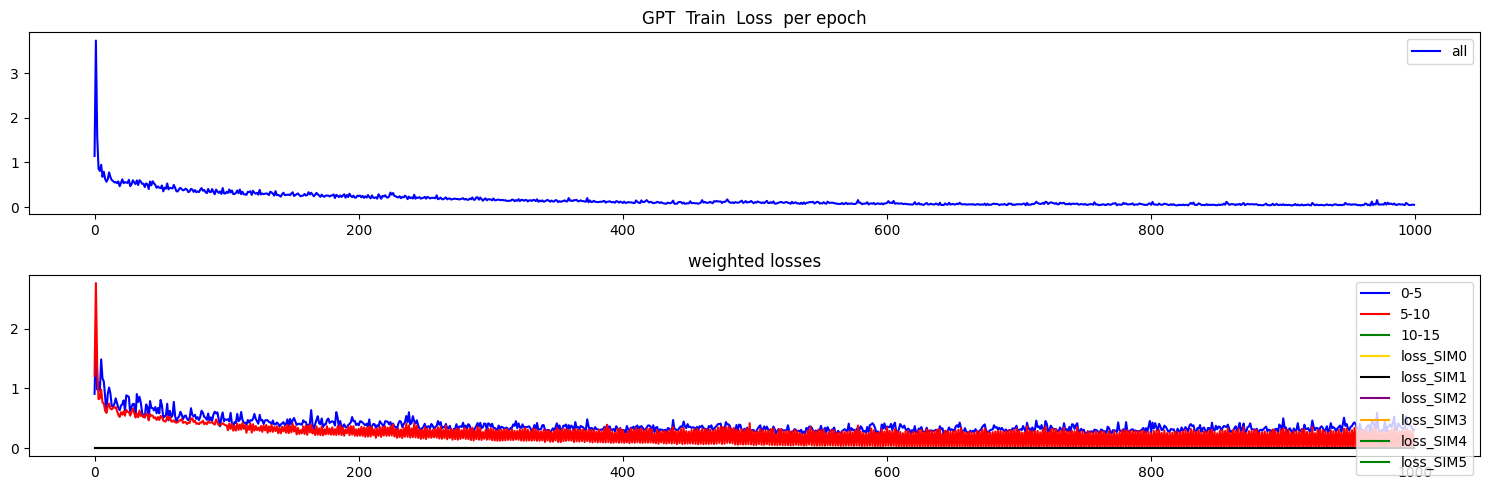

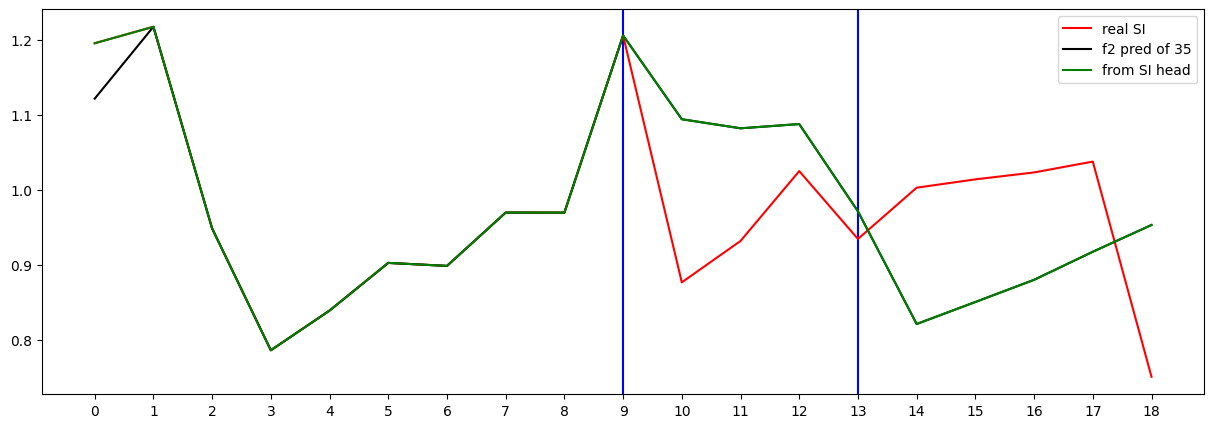

Testing R**2 - (all) - (no inputs):  0.9964858540776391
Testing R**2 - (f2) - SI full (no inputs):  -1.0894374687108512
Testing R**2 - SI head only (no inputs):  -1.0894374687108512
0 ...index R**2 (no inputs):  -0.44020435332579333
1 ...index R**2 (no inputs):  0.10572724771573228
2 ...index R**2 (no inputs):  -1.0894374687108512
3 ...index R**2 (no inputs):  -11.118106995831349
4 ...index R**2 (no inputs):  -0.8351796933322395
5 ...index R**2 (no inputs):  -0.1360646237969496
6 ...index R**2 (no inputs):  -4.675225729463845
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.118906754593981
10 ...index R**2 (no inputs):  0.35706724188599925
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -41.04928205434755
16 ...index R**2 (no inputs):  -1.93810345216931
17 ...index R**2 (no inputs):  -271.89941116021225
18 ...inde

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.128269
Loss_SI: 1.3250707387924194 Loss_all: 1.1774568557739258
===
[200] Train Loss: 0.054704
Loss_SI: 0.4535799026489258 Loss_all: 0.28977957367897034
===
[400] Train Loss: 0.031643
Loss_SI: 0.6953547596931458 Loss_all: 0.3182767927646637
===
[600] Train Loss: 0.028529
Loss_SI: 0.5904393196105957 Loss_all: 0.3321370482444763
===
[800] Train Loss: 0.017677
Loss_SI: 0.6154563426971436 Loss_all: 0.3195039927959442
===


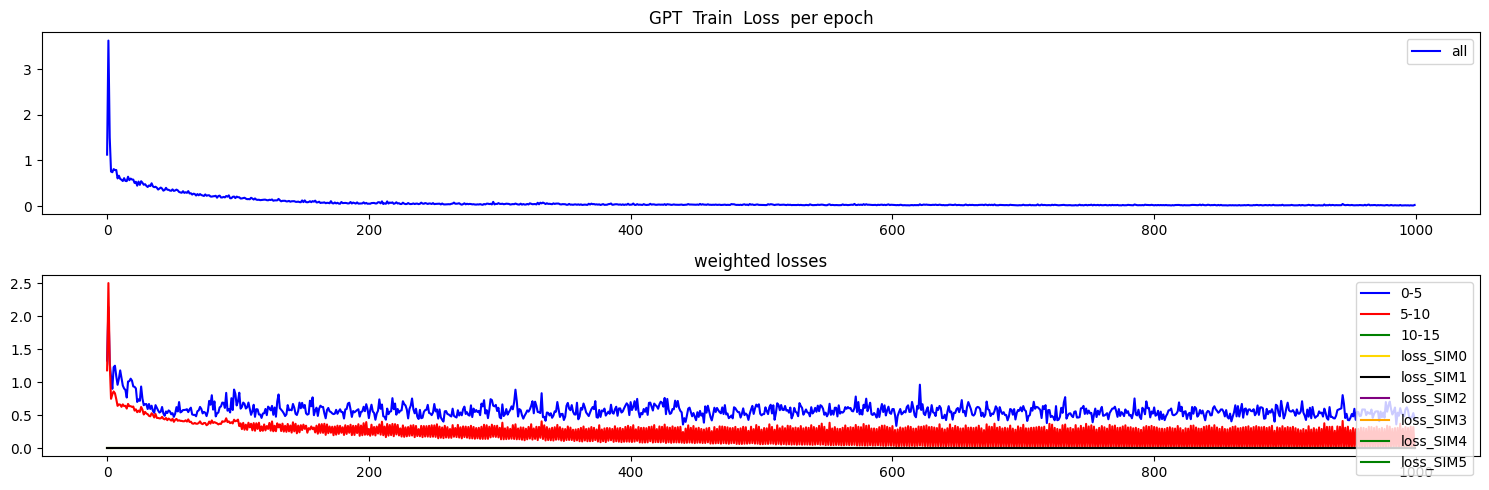

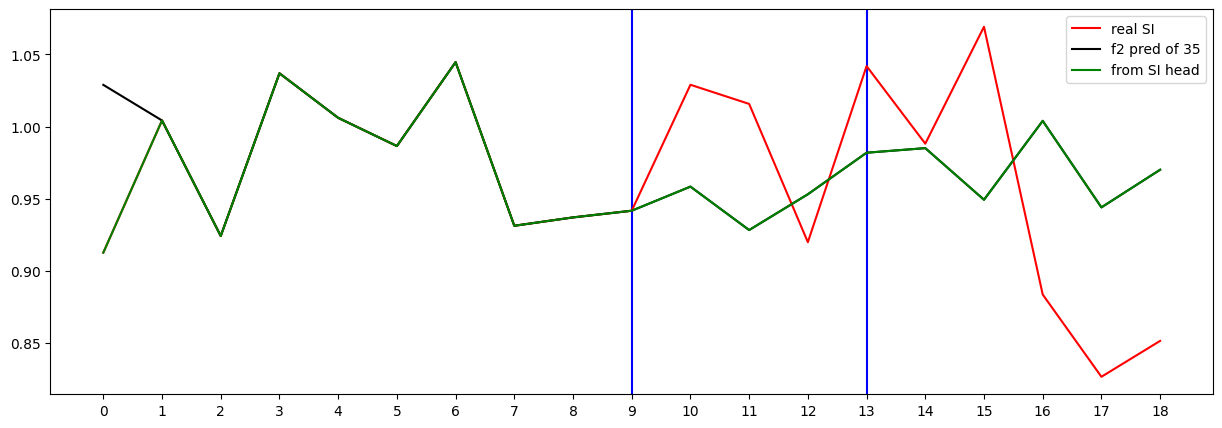

Testing R**2 - (all) - (no inputs):  0.9961891622915532
Testing R**2 - (f2) - SI full (no inputs):  -0.10204629697587131
Testing R**2 - SI head only (no inputs):  -0.10204629697587131
0 ...index R**2 (no inputs):  0.013283011926123134
1 ...index R**2 (no inputs):  -1.9204712942413953
2 ...index R**2 (no inputs):  -0.10204629697587131
3 ...index R**2 (no inputs):  -36.81033581182293
4 ...index R**2 (no inputs):  -2.659022293967387
5 ...index R**2 (no inputs):  -526.4793858559044
6 ...index R**2 (no inputs):  -154.72041524618206
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.05427228876969603
10 ...index R**2 (no inputs):  -0.18186450733036597
11 ...index R**2 (no inputs):  -2.6660042652057285
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9330264585639019
16 ...index R**2 (no inputs):  -0.7025227615646474
17 ...index R**2 (no inputs):  -12.085

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.185475
Loss_SI: 1.6023262739181519 Loss_all: 1.2618589401245117
===
[200] Train Loss: 0.132314
Loss_SI: 0.532298743724823 Loss_all: 0.3190973103046417
===
[400] Train Loss: 0.061985
Loss_SI: 0.4487778842449188 Loss_all: 0.2809031307697296
===
[600] Train Loss: 0.034269
Loss_SI: 0.35614439845085144 Loss_all: 0.24657727777957916
===
[800] Train Loss: 0.037564
Loss_SI: 0.4277268350124359 Loss_all: 0.25310713052749634
===


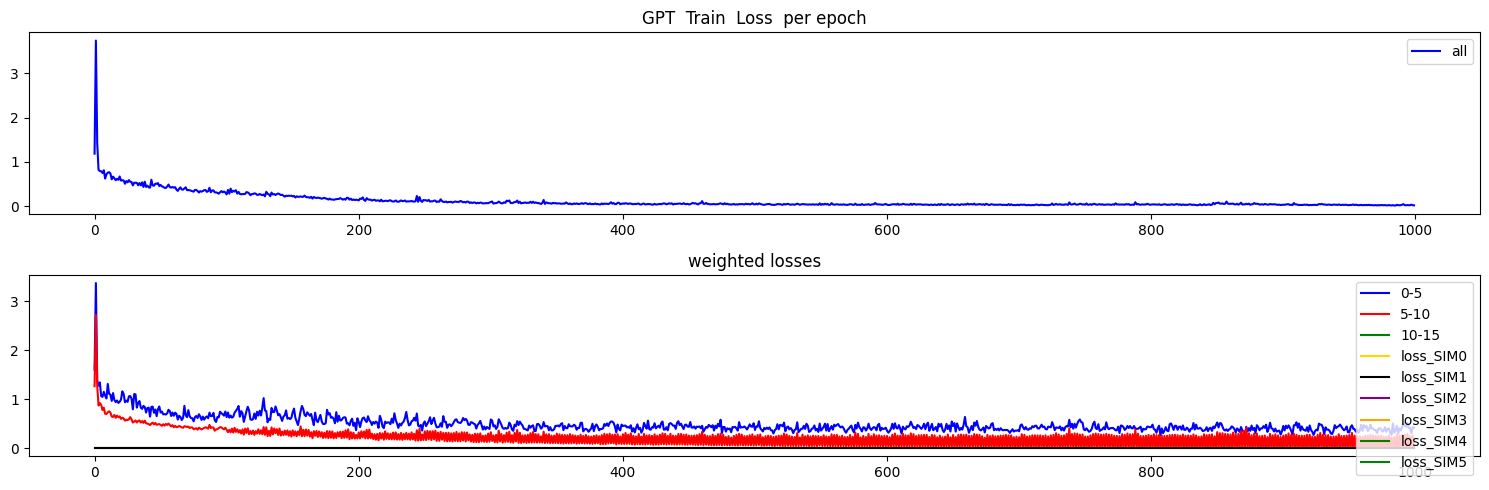

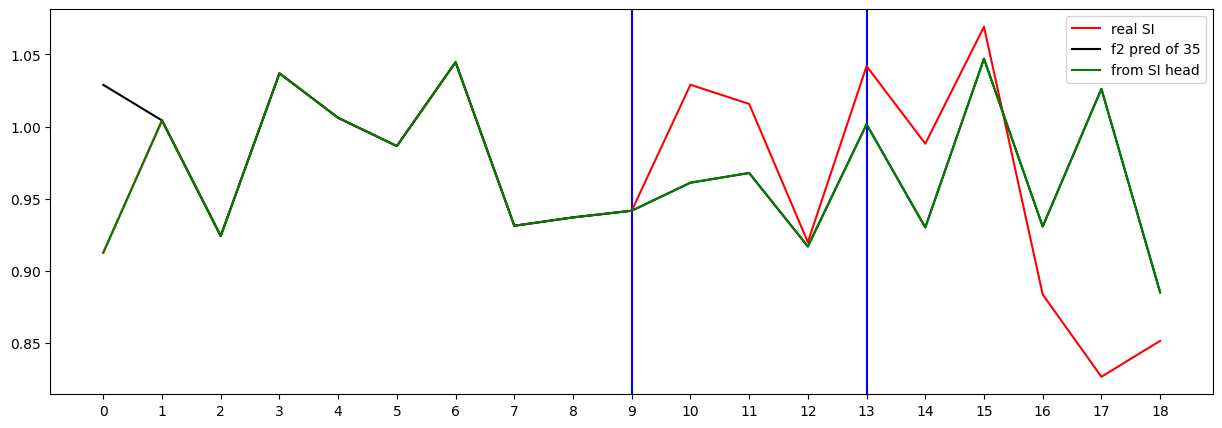

Testing R**2 - (all) - (no inputs):  0.9987258336344402
Testing R**2 - (f2) - SI full (no inputs):  -0.8245830429951637
Testing R**2 - SI head only (no inputs):  -0.8245830429951637
0 ...index R**2 (no inputs):  -2.2111076947177697
1 ...index R**2 (no inputs):  -3.9337926614577468
2 ...index R**2 (no inputs):  -0.8245830429951637
3 ...index R**2 (no inputs):  -15.40660940217452
4 ...index R**2 (no inputs):  -0.44028119584532877
5 ...index R**2 (no inputs):  -172.7311358239324
6 ...index R**2 (no inputs):  -19.68663435774256
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.16140151411392978
10 ...index R**2 (no inputs):  -0.3814308707869447
11 ...index R**2 (no inputs):  -52.399412666625445
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.724902050817432
16 ...index R**2 (no inputs):  -1.7108990159888178
17 ...index R**2 (no inputs):  -17.97671420

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.088078
Loss_SI: 1.29812753200531 Loss_all: 1.1857590675354004
===
[200] Train Loss: 0.221457
Loss_SI: 0.33971482515335083 Loss_all: 0.33578526973724365
===
[400] Train Loss: 0.098035
Loss_SI: 0.23113365471363068 Loss_all: 0.26230958104133606
===
[600] Train Loss: 0.043710
Loss_SI: 0.19533108174800873 Loss_all: 0.22426091134548187
===
[800] Train Loss: 0.047616
Loss_SI: 0.2550997734069824 Loss_all: 0.2409534901380539
===


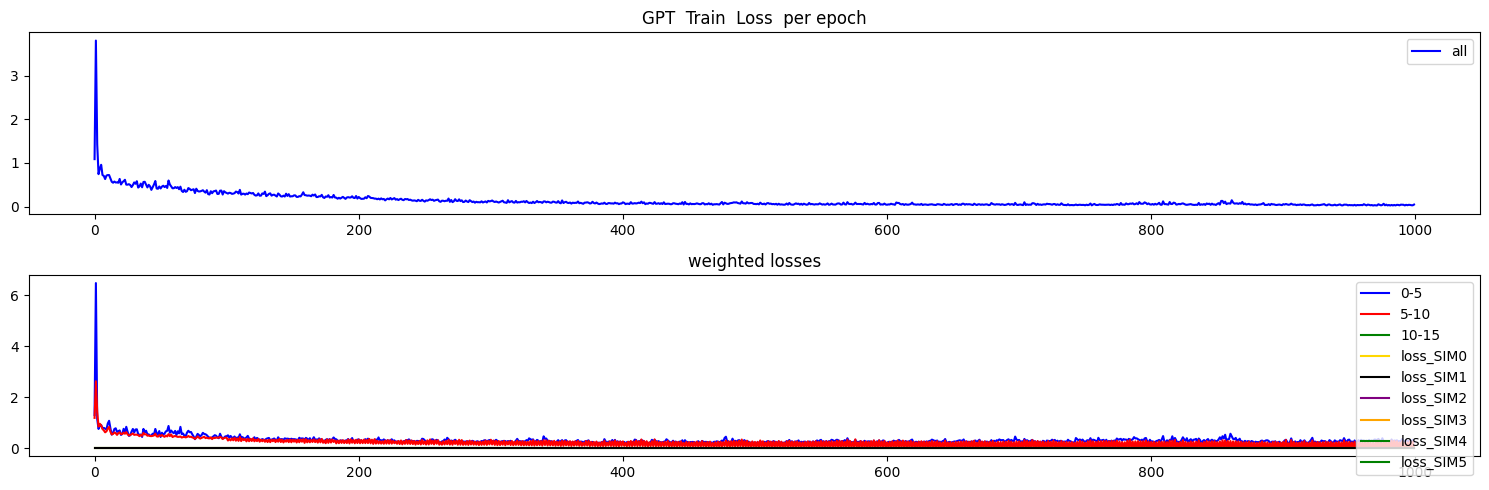

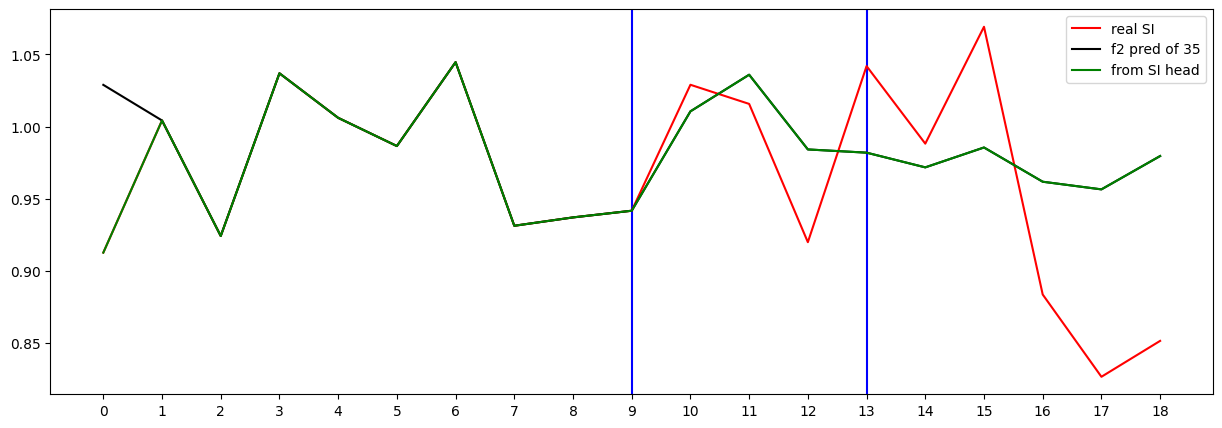

Testing R**2 - (all) - (no inputs):  0.9897279248399066
Testing R**2 - (f2) - SI full (no inputs):  -0.17772851408895463
Testing R**2 - SI head only (no inputs):  -0.17772851408895463
0 ...index R**2 (no inputs):  -0.3896239289533028
1 ...index R**2 (no inputs):  -3.4686020211576496
2 ...index R**2 (no inputs):  -0.17772851408895463
3 ...index R**2 (no inputs):  -31.904449979612636
4 ...index R**2 (no inputs):  -1.5451738768746623
5 ...index R**2 (no inputs):  -1415.6444957737187
6 ...index R**2 (no inputs):  -66.51505753628565
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.02319882988165478
10 ...index R**2 (no inputs):  -0.10279373111048673
11 ...index R**2 (no inputs):  -7.9788449334456395
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.2455805744437662
16 ...index R**2 (no inputs):  -0.7130098209589613
17 ...index R**2 (no inputs):  -575.6

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.201619
Loss_SI: 1.5354843139648438 Loss_all: 1.3225321769714355
===
[200] Train Loss: 0.211827
Loss_SI: 0.4127310812473297 Loss_all: 0.3178583085536957
===
[400] Train Loss: 0.103825
Loss_SI: 0.2894188165664673 Loss_all: 0.2921815812587738
===
[600] Train Loss: 0.081461
Loss_SI: 0.3220697045326233 Loss_all: 0.27829641103744507
===
[800] Train Loss: 0.058713
Loss_SI: 0.346040815114975 Loss_all: 0.2975604832172394
===


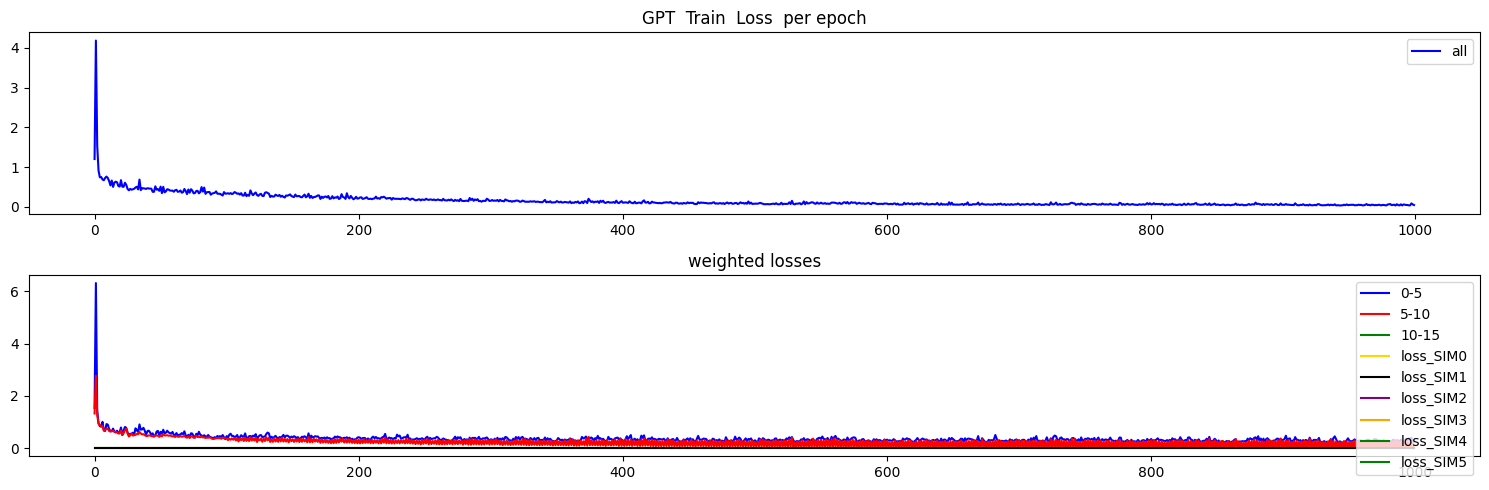

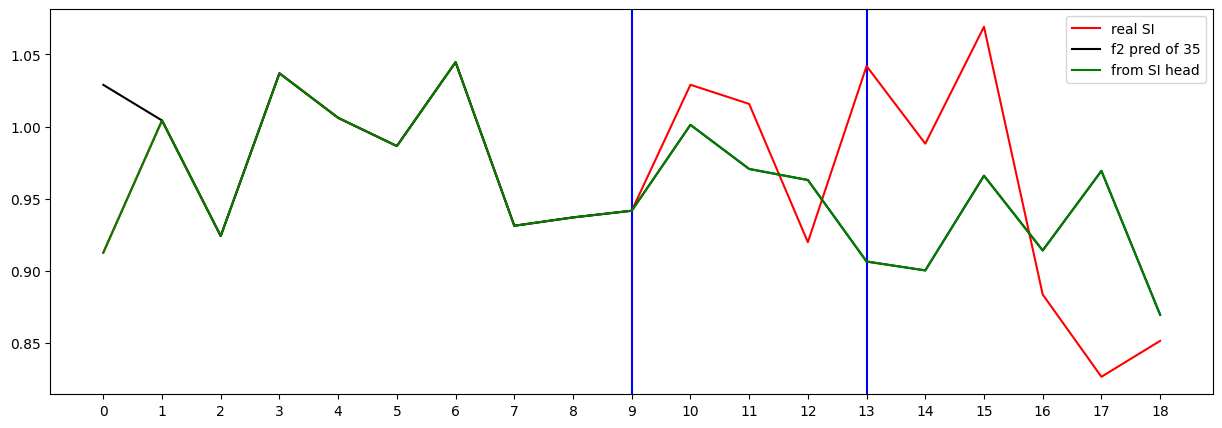

Testing R**2 - (all) - (no inputs):  0.9988127739126882
Testing R**2 - (f2) - SI full (no inputs):  -0.24220743065779304
Testing R**2 - SI head only (no inputs):  -0.24220743065779304
0 ...index R**2 (no inputs):  -0.8030739789972186
1 ...index R**2 (no inputs):  -3.003087113669481
2 ...index R**2 (no inputs):  -0.24220743065779304
3 ...index R**2 (no inputs):  -33.98086928714123
4 ...index R**2 (no inputs):  -3.9710694860975257
5 ...index R**2 (no inputs):  -158.66463233718196
6 ...index R**2 (no inputs):  -117.15089250063356
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.18000219045522325
10 ...index R**2 (no inputs):  -0.5743209774385025
11 ...index R**2 (no inputs):  -51.055386936807075
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8257249066008892
16 ...index R**2 (no inputs):  -7.624921295685153
17 ...index R**2 (no inputs):  -99.095973

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.139235
Loss_SI: 1.1619296073913574 Loss_all: 1.1166001558303833
===
[200] Train Loss: 0.085539
Loss_SI: 0.445225328207016 Loss_all: 0.34026938676834106
===
[400] Train Loss: 0.024158
Loss_SI: 0.315708726644516 Loss_all: 0.2934129536151886
===
[600] Train Loss: 0.028511
Loss_SI: 0.32546326518058777 Loss_all: 0.3168479800224304
===
[800] Train Loss: 0.019333
Loss_SI: 0.3476060926914215 Loss_all: 0.2702835202217102
===


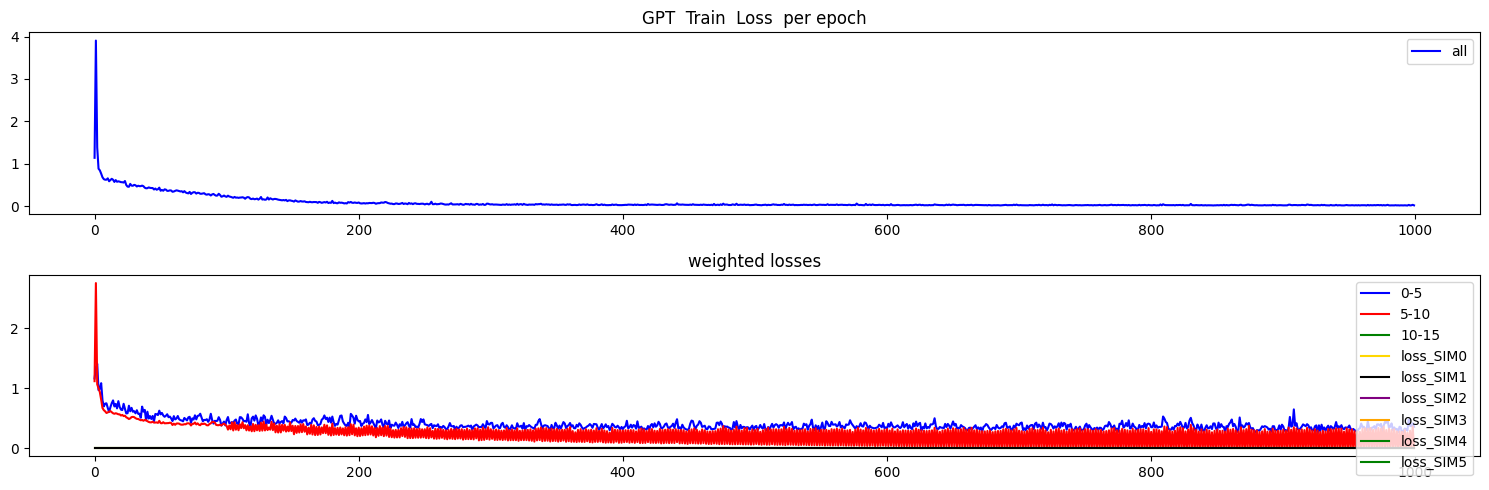

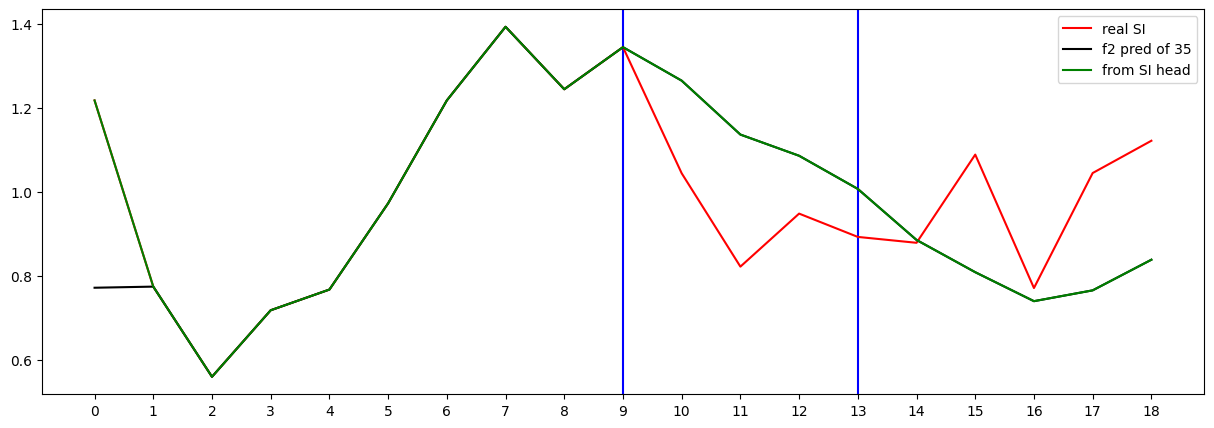

Testing R**2 - (all) - (no inputs):  0.99900506533988
Testing R**2 - (f2) - SI full (no inputs):  -2.8433477354229835
Testing R**2 - SI head only (no inputs):  -2.8433477354229835
0 ...index R**2 (no inputs):  -0.0903951417025477
1 ...index R**2 (no inputs):  0.3120884651903203
2 ...index R**2 (no inputs):  -2.8433477354229835
3 ...index R**2 (no inputs):  -42.350100470847465
4 ...index R**2 (no inputs):  -1.2576343279631006
5 ...index R**2 (no inputs):  -12.281003254580979
6 ...index R**2 (no inputs):  -2.5604262848170434
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7361160136572007
10 ...index R**2 (no inputs):  -1.4794274576321844
11 ...index R**2 (no inputs):  -4.352293683614153
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.020345587093387
16 ...index R**2 (no inputs):  -0.31743013859315816
17 ...index R**2 (no inputs):  -4.77813778663

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.235816
Loss_SI: 1.3526922464370728 Loss_all: 1.2912698984146118
===
[200] Train Loss: 0.104105
Loss_SI: 0.5119790434837341 Loss_all: 0.3191700875759125
===
[400] Train Loss: 0.041450
Loss_SI: 0.31827887892723083 Loss_all: 0.24691881239414215
===
[600] Train Loss: 0.032472
Loss_SI: 0.4105052947998047 Loss_all: 0.2685563862323761
===
[800] Train Loss: 0.036916
Loss_SI: 0.3890109956264496 Loss_all: 0.2554725408554077
===


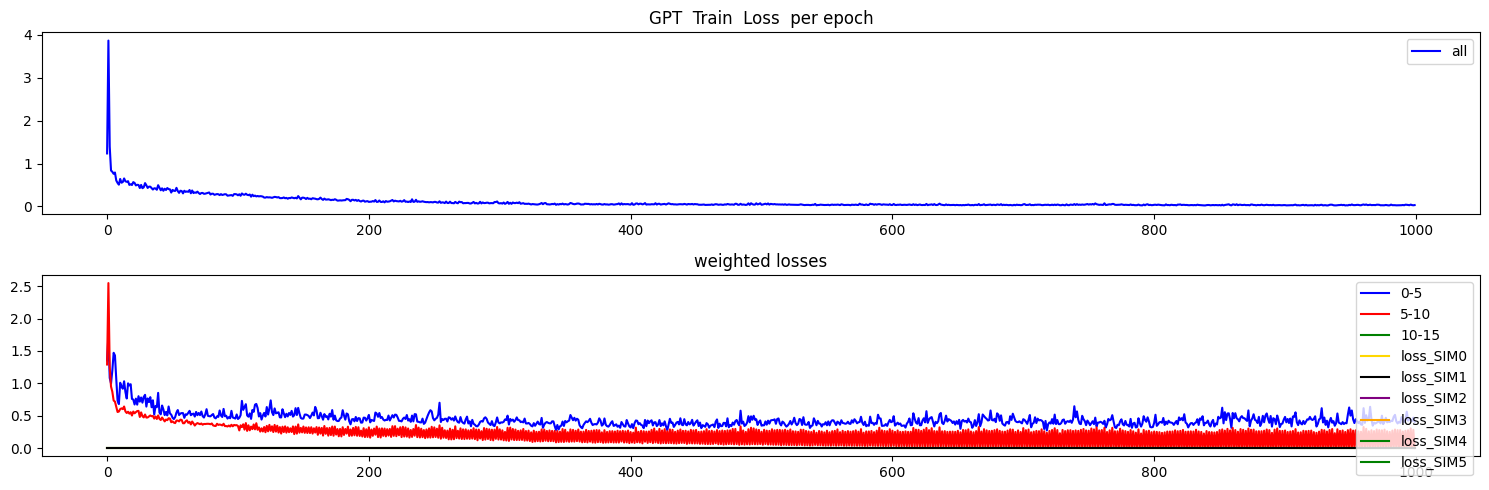

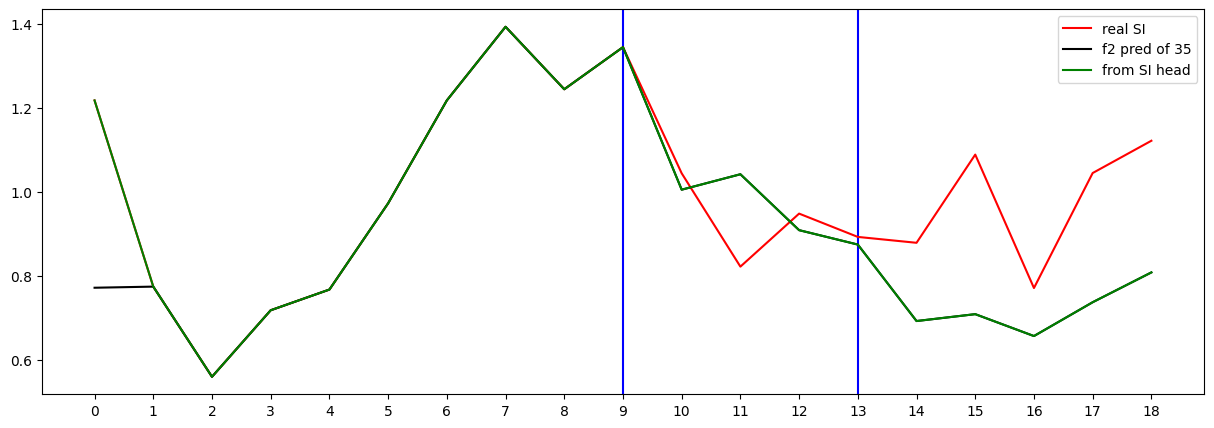

Testing R**2 - (all) - (no inputs):  0.9993231016423322
Testing R**2 - (f2) - SI full (no inputs):  -2.720687266598004
Testing R**2 - SI head only (no inputs):  -2.720687266598004
0 ...index R**2 (no inputs):  -0.09365734983509832
1 ...index R**2 (no inputs):  0.49251736500237586
2 ...index R**2 (no inputs):  -2.720687266598004
3 ...index R**2 (no inputs):  -1111.6536058878928
4 ...index R**2 (no inputs):  -0.6917614224969839
5 ...index R**2 (no inputs):  -7.924314963625601
6 ...index R**2 (no inputs):  -2.268626467741983
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3067614908971978
10 ...index R**2 (no inputs):  -0.7227671684570682
11 ...index R**2 (no inputs):  -7.9461582012875684
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.9737237627554247
16 ...index R**2 (no inputs):  -0.5381471203285924
17 ...index R**2 (no inputs):  -5.41232566977

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.200374
Loss_SI: 1.068994164466858 Loss_all: 1.187530755996704
===
[200] Train Loss: 0.186792
Loss_SI: 0.5214176177978516 Loss_all: 0.3359372913837433
===
[400] Train Loss: 0.061351
Loss_SI: 0.39776620268821716 Loss_all: 0.2873684763908386
===
[600] Train Loss: 0.043856
Loss_SI: 0.3767125904560089 Loss_all: 0.25136643648147583
===
[800] Train Loss: 0.039239
Loss_SI: 0.3133770227432251 Loss_all: 0.25798988342285156
===


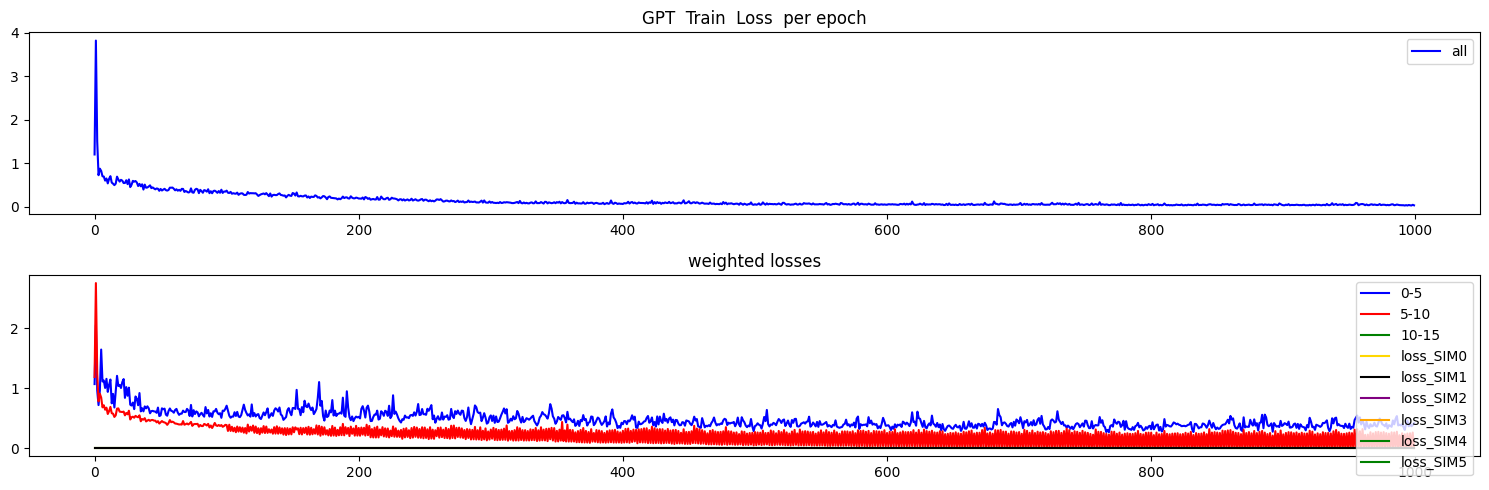

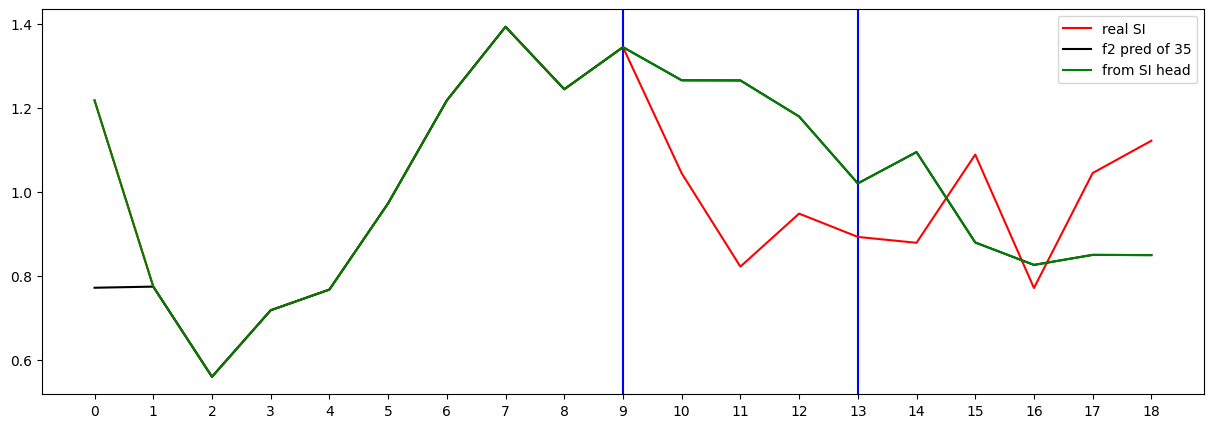

Testing R**2 - (all) - (no inputs):  0.9909417569600701
Testing R**2 - (f2) - SI full (no inputs):  -2.715163794301928
Testing R**2 - SI head only (no inputs):  -2.715163794301928
0 ...index R**2 (no inputs):  0.46157705621273504
1 ...index R**2 (no inputs):  0.18941802467872315
2 ...index R**2 (no inputs):  -2.715163794301928
3 ...index R**2 (no inputs):  -3021.0807353595183
4 ...index R**2 (no inputs):  -1.0522539239344857
5 ...index R**2 (no inputs):  -121.94395542898206
6 ...index R**2 (no inputs):  -5.779322987894393
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2972737996685497
10 ...index R**2 (no inputs):  -1.0870031724763733
11 ...index R**2 (no inputs):  -58.77564000206021
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.1542111068566667
16 ...index R**2 (no inputs):  -0.8847475001072544
17 ...index R**2 (no inputs):  -41.57687451860

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.284909
Loss_SI: 1.2665619850158691 Loss_all: 1.3434779644012451
===
[200] Train Loss: 0.220973
Loss_SI: 0.28890421986579895 Loss_all: 0.2651500403881073
===
[400] Train Loss: 0.154817
Loss_SI: 0.345738023519516 Loss_all: 0.3121122121810913
===
[600] Train Loss: 0.054946
Loss_SI: 0.20115776360034943 Loss_all: 0.22557388246059418
===
[800] Train Loss: 0.069731
Loss_SI: 0.2417421191930771 Loss_all: 0.25615784525871277
===


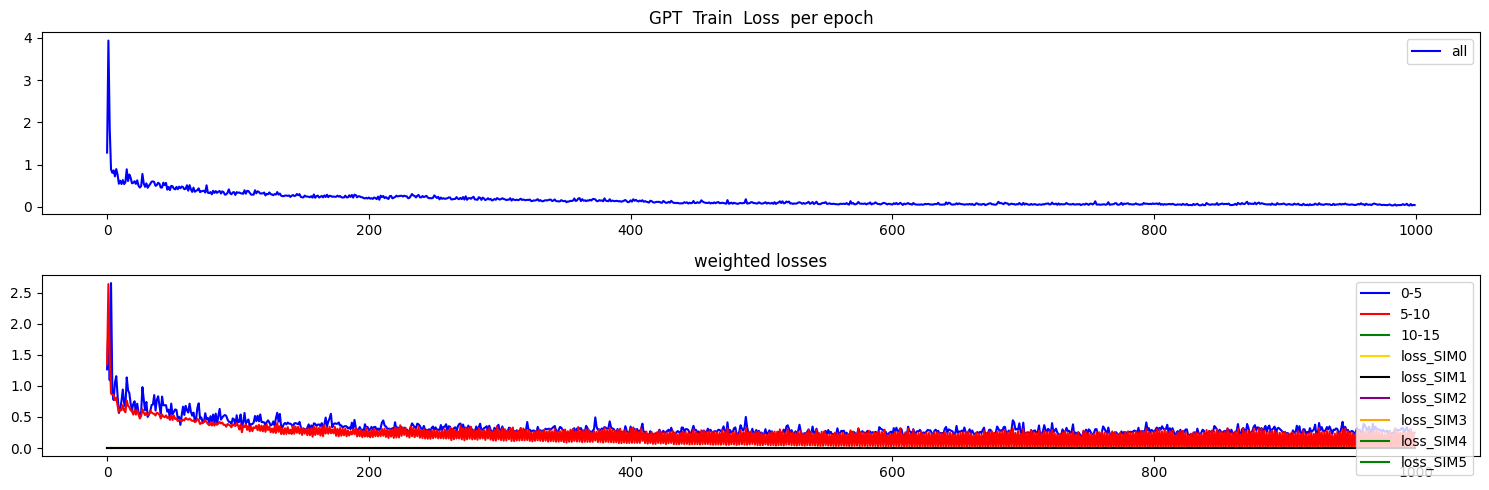

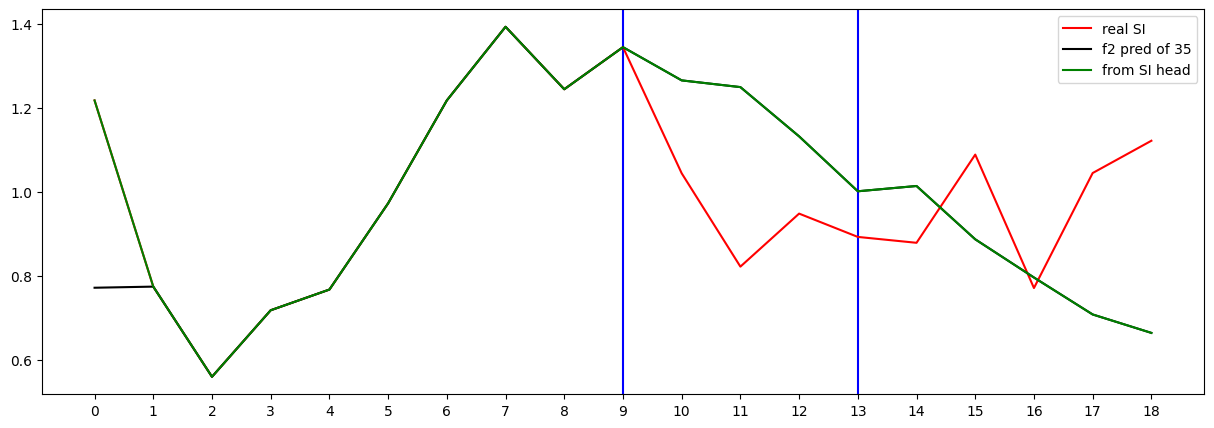

Testing R**2 - (all) - (no inputs):  0.9937003580374183
Testing R**2 - (f2) - SI full (no inputs):  -4.10057139104358
Testing R**2 - SI head only (no inputs):  -4.10057139104358
0 ...index R**2 (no inputs):  -0.09221532718745928
1 ...index R**2 (no inputs):  -0.008173705130962272
2 ...index R**2 (no inputs):  -4.10057139104358
3 ...index R**2 (no inputs):  -5653.733610076908
4 ...index R**2 (no inputs):  -0.2983542939540105
5 ...index R**2 (no inputs):  -84.48481957323109
6 ...index R**2 (no inputs):  -10.742922055657337
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.24863047068394595
10 ...index R**2 (no inputs):  -0.6360511476822057
11 ...index R**2 (no inputs):  -20.83291460502303
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.550480772866961
16 ...index R**2 (no inputs):  -0.8872219543814384
17 ...index R**2 (no inputs):  -42.236119258650

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -1.0742455674979912


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.8080909121240216


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.8548158252203952


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -1.123258046590117



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: -13.2878556421332
Naive_R2:....................................R²: -5.2390
RMSE:0.2232,MAE:0.1796,MASE:2.4523
1 .......................R² on just step n - R²: -13.2878556421332
Naive_R2:....................................R²: -5.2390
RMSE:0.2232,MAE:0.1796,MASE:2.4523
2 .....................R² on first n steps - R²: -1.9065826336577691
Naive_R2:....................................R²: -0.5350
RMSE:0.2066,MAE:0.1719,MASE:1.1555
2 .......................R² on just step n - R²: -0.3743605302067181
Naive_R2:....................................R²: 0.5271
RMSE:0.1886,MAE:0.1641,MASE:0.6862
3 .....................R² on first n steps - R²: -2.428052306065607
Naive_R2:....................................R²: -0.7374
RMSE:0.1931,MAE:0.1568,MASE:1.2514
3 .......................R² on just step n - R²: -7.296462525553892
Naive_R2:....................................R²: -2.6449
RMSE:0.1628,MAE:0.1265,MASE:1.5728
4 .....................R² on first n step

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: -3.3835125567039332
Naive_R2:....................................R²: -0.9141
RMSE:0.1236,MAE:0.1004,MASE:1.3703
1 .......................R² on just step n - R²: -3.3835125567039332
Naive_R2:....................................R²: -0.9141
RMSE:0.1236,MAE:0.1004,MASE:1.3703
2 .....................R² on first n steps - R²: -0.5448705026918155
Naive_R2:....................................R²: 0.1841
RMSE:0.1506,MAE:0.1254,MASE:0.8429
2 .......................R² on just step n - R²: -0.16311034294059423
Naive_R2:....................................R²: 0.5998
RMSE:0.1735,MAE:0.1504,MASE:0.6288
3 .....................R² on first n steps - R²: -0.5958394999203986
Naive_R2:....................................R²: 0.1912
RMSE:0.1317,MAE:0.1059,MASE:0.8453
3 .......................R² on just step n - R²: -1.098194641362403
Naive_R2:....................................R²: 0.0782
RMSE:0.0819,MAE:0.0669,MASE:0.8315
4 .....................R² on first n s

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: -13.80231224435702
Naive_R2:....................................R²: -5.4637
RMSE:0.2272,MAE:0.1676,MASE:2.2885
1 .......................R² on just step n - R²: -13.80231224435702
Naive_R2:....................................R²: -5.4637
RMSE:0.2272,MAE:0.1676,MASE:2.2885
2 .....................R² on first n steps - R²: -2.3692676754191098
Naive_R2:....................................R²: -0.7793
RMSE:0.2224,MAE:0.1854,MASE:1.2464
2 .......................R² on just step n - R²: -0.8302931329762417
Naive_R2:....................................R²: 0.3702
RMSE:0.2176,MAE:0.2032,MASE:0.8495
3 .....................R² on first n steps - R²: -2.7708159940540713
Naive_R2:....................................R²: -0.9111
RMSE:0.2025,MAE:0.1694,MASE:1.3527
3 .......................R² on just step n - R²: -6.54343234510771
Naive_R2:....................................R²: -2.3140
RMSE:0.1552,MAE:0.1375,MASE:1.7096
4 .....................R² on first n st

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: -10.197511465054065
Naive_R2:....................................R²: -3.8896
RMSE:0.1976,MAE:0.1305,MASE:1.7811
1 .......................R² on just step n - R²: -10.197511465054065
Naive_R2:....................................R²: -3.8896
RMSE:0.1976,MAE:0.1305,MASE:1.7811
2 .....................R² on first n steps - R²: -1.5072750980195329
Naive_R2:....................................R²: -0.3241
RMSE:0.1919,MAE:0.1438,MASE:0.9671
2 .......................R² on just step n - R²: -0.33747737702001435
Naive_R2:....................................R²: 0.5398
RMSE:0.1860,MAE:0.1572,MASE:0.6574
3 .....................R² on first n steps - R²: -1.7199303536889952
Naive_R2:....................................R²: -0.3785
RMSE:0.1720,MAE:0.1269,MASE:1.0130
3 .......................R² on just step n - R²: -3.733065668250327
Naive_R2:....................................R²: -1.0794
RMSE:0.1229,MAE:0.0930,MASE:1.1559
4 .....................R² on first 


## Plot


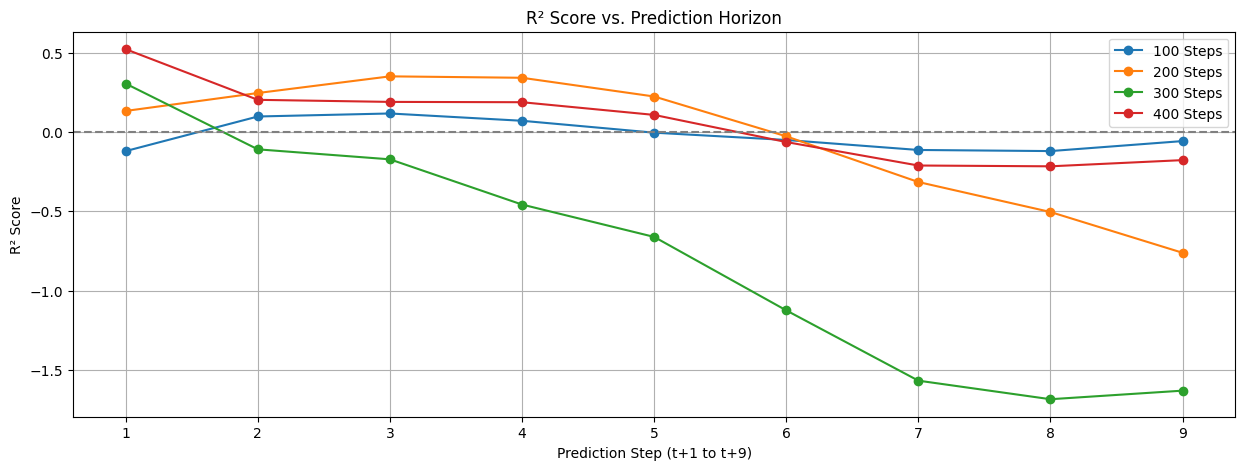

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
